### Load the Data

In [624]:
# import necessary package
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

### DataBase Details: 
##### SQL database 
- DB Name: project_telecom 
- Table Name: telecom_churn_data 
- Host: 54.255.64.49 
- Username: dm_team3 
- Password: DM!$!Team!27@9!20&

##### Meta Info of Data 
     1. State                           4617 non-null         object 
     2. Account Length                  4617 non-null          int64 
     3. Area Code                       4617 non-null          int64 
     4. Phone                           4617 non-null         object
     5. International Plan              4617 non-null         object
     6. VMail Plan                      4617 non-null         object
     7. VMail Message                   4617 non-null          int64 
     8. Day Mins                        4617 non-null         float64
     9. Day Calls                       4617 non-null          int64 
     10. Day Charge                     4617 non-null         float64
     11. Eve Mins                       4617 non-null         float64
     12. Eve Calls                      4617 non-null          int64 
     13. Eve Charge                     4617 non-null         float64
     14. Night Mins                     4617 non-null         float64
     15. Night Calls                    4617 non-null          int64 
     16. Night Charge                   4617 non-null         float64
     17. International Mins             4617 non-null         float64
     18. International calls            4617 non-null          int64 
     19. International Charge           4617 non-null         float64
     20. CustServ Calls                 4617 non-null          int64 
     21. Churn                          4617 non-null         object

### Connecting Data

In [625]:
db_host = '54.255.64.49'
username = 'dm_team3'
user_pass = 'DM!$!Team!27@9!20&'
db_name = 'project_telecom'

In [626]:
# making connections and connecting the database
conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)

In [627]:
# getting the database table name                                 
conn.table_names()

['telecom_churn_data']

In [628]:
# query the table
query = 'select * from telecom_churn_data'
churn = pd.read_sql(query,conn)
print(churn.shape)
churn

(4617, 21)


columns1 columns2 columns3   columns4 columns5 columns6 columns7  \
0          KS      128      415   382-4657       no      yes       25   
1          OH      107      415   371-7191       no      yes       26   
2          NJ      137      415   358-1921       no       no        0   
3          OH       84      408   375-9999      yes       no        0   
4          OK       75      415   330-6626      yes       no        0   
...       ...      ...      ...        ...      ...      ...      ...   
4612       NY       57      510   345-7512       no      yes       25   
4613       NM      177      408   343-6820       no      yes       29   
4614       VT       67      408   338-4794       no      yes       33   
4615       MI       98      415   355-8388       no      yes       23   
4616       IN      140      415   409-6884       no       no        0   

     columns8 columns9 columns10  ... columns12 columns13 columns14 columns15  \
0       265.1      110     45.07  ...        99     16.78     244.7        91   
1       161.6      123     27.47  ...       103     16.62     254.4       103   
2       243.4      114     41.38  ...       110      10.3     162.6       104   
3       299.4       71      50.9  ...        88      5.26     196.9        89   
4       166.7      113     28.34  ...       122     12.61     186.9       121   
...       ...      ...       ...  ...       ...       ...       ...       ...   
4612      144       81     24.48  ...       112     15.91     158.6       122   
4613      189       91     32.13  ...        96     25.76     163.6       116   
4614    127.5      126     21.68  ...       129     25.17     200.9        91   
4615    168.9       98     28.71  ...       117     19.24     165.5        96   
4616    204.7      100      34.8  ...       107     10.78     202.8       115   

     columns16 columns17 columns18 columns19 columns20 columns21  
0        11.01        10         3       2.7         1    False.  
1        11.45      13.7         3       3.7         1    False.  
2         7.32      12.2         5      3.29         0    False.  
3         8.86       6.6         7      1.78         2    False.  
4         8.41      10.1         3      2.73         3    False.  
...        ...       ...       ...       ...       ...       ...  
4612      7.14       8.5         6       2.3         3    False.  
4613      7.36      15.7         1      4.24         3    False.  
4614      9.04        13         3      3.51         1    False.  
4615      7.45      14.3         3      3.86         0    False.  
4616      9.13      12.1         4      3.27         2    False.  

[4617 rows x 21 columns]

- Dataset have 4617 rows × 21 columns

# Problem :  This is Binary Classification Problem

### Exploratory Data Analysis

In [629]:
churn.shape

(4617, 21)

- Shape of data

In [630]:
# Check NaN Values
np.nan == True

False

In [631]:
# Calculating NaN Values
churn.isnull().sum().sum()

0

- Null/NaN/Missing Values aren't Present in Dataset

In [632]:
# Check duplicate values
churn.duplicated == True

False

In [633]:
# calculating duplicate values
churn.duplicated().sum()

0

- Duplicate Values aren't Present in Dataset

In [634]:
# All columns in dataset
churn.columns

Index(['columns1', 'columns2', 'columns3', 'columns4', 'columns5', 'columns6',
       'columns7', 'columns8', 'columns9', 'columns10', 'columns11',
       'columns12', 'columns13', 'columns14', 'columns15', 'columns16',
       'columns17', 'columns18', 'columns19', 'columns20', 'columns21'],
      dtype='object')

- We Shoud have to Change Columns Name According to given Information

In [635]:
# Information of data
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   columns1   4617 non-null   object
 1   columns2   4617 non-null   object
 2   columns3   4617 non-null   object
 3   columns4   4617 non-null   object
 4   columns5   4617 non-null   object
 5   columns6   4617 non-null   object
 6   columns7   4617 non-null   object
 7   columns8   4617 non-null   object
 8   columns9   4617 non-null   object
 9   columns10  4617 non-null   object
 10  columns11  4617 non-null   object
 11  columns12  4617 non-null   object
 12  columns13  4617 non-null   object
 13  columns14  4617 non-null   object
 14  columns15  4617 non-null   object
 15  columns16  4617 non-null   object
 16  columns17  4617 non-null   object
 17  columns18  4617 non-null   object
 18  columns19  4617 non-null   object
 19  columns20  4617 non-null   object
 20  columns21  4617 non-null   obj

- We Shoud have to Change Data Type of Dataset According to given Information

In [636]:
# Renaming 
churn.rename(columns={'columns1':'State','columns2':'Account Length','columns3':'Area Code','columns4':'Phone',
                      'columns5':'International Plan','columns6':'VMail Plan','columns7':'VMail Message',
                      'columns8':'Day Mins','columns9':'Day Calls','columns10':'Day Charge','columns11':'Eve Mins',
                      'columns12':'Eve Calls','columns13':'Eve Charge','columns14':'Night Mins','columns15':'Night Calls',
                      'columns16':'Night Charge','columns17':'International Mins','columns18':'International Calls',
                      'columns19':'International Charge','columns20':'CustServ Calls','columns21':'Churn'},
             inplace=True) 

In [637]:
churn.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

- All The Columns in Dataset 

In [638]:
# changing Datasets data type 
data_types_dict = {'Account Length': 'int64','Area Code': 'int64','VMail Message': 'int64','Day Calls': 'int64',
                  'Eve Calls': 'int64','Night Calls': 'int64','International Calls': 'int64','CustServ Calls': 'int64',
                  'Day Mins': 'float64','Day Charge': 'float64','Eve Mins': 'float64','Eve Charge': 'float64',
                  'Night Mins': 'float64','Night Charge': 'float64','International Mins': 'float64',
                  'International Charge': 'float'} 
churn = churn.astype(data_types_dict)

In [639]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International Plan    4617 non-null   object 
 5   VMail Plan            4617 non-null   object 
 6   VMail Message         4617 non-null   int64  
 7   Day Mins              4617 non-null   float64
 8   Day Calls             4617 non-null   int64  
 9   Day Charge            4617 non-null   float64
 10  Eve Mins              4617 non-null   float64
 11  Eve Calls             4617 non-null   int64  
 12  Eve Charge            4617 non-null   float64
 13  Night Mins            4617 non-null   float64
 14  Night Calls           4617 non-null   int64  
 15  Night Charge         

- 8 Column in Dataset have dtype of float64
- 8 Column in Dataset have dtype of int64
- 5 Column in Dataset have dtype of object

In [640]:
churn.head(5)

State  Account Length  Area Code      Phone International Plan VMail Plan  \
0    KS             128        415   382-4657                 no        yes   
1    OH             107        415   371-7191                 no        yes   
2    NJ             137        415   358-1921                 no         no   
3    OH              84        408   375-9999                yes         no   
4    OK              75        415   330-6626                yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  International Mins  \
0       244.7           91         11.01                10.0   
1       254.4          103         11.45                13.7   
2       162.6          104          7.32                12.2   
3       196.9           89          8.86                 6.6   
4       186.9          121          8.41                10.1   

   International Calls  International Charge  CustServ Calls    Churn  
0                    3                  2.70               1   False.  
1                    3                  3.70               1   False.  
2                    5                  3.29               0   False.  
3                    7                  1.78               2   False.  
4                    3                  2.73               3   False.  

[5 rows x 21 columns]

In [641]:
churn.tail(5)

State  Account Length  Area Code      Phone International Plan  \
4612    NY              57        510   345-7512                 no   
4613    NM             177        408   343-6820                 no   
4614    VT              67        408   338-4794                 no   
4615    MI              98        415   355-8388                 no   
4616    IN             140        415   409-6884                 no   

     VMail Plan  VMail Message  Day Mins  Day Calls  Day Charge  ...  \
4612        yes             25     144.0         81       24.48  ...   
4613        yes             29     189.0         91       32.13  ...   
4614        yes             33     127.5        126       21.68  ...   
4615        yes             23     168.9         98       28.71  ...   
4616         no              0     204.7        100       34.80  ...   

      Eve Calls  Eve Charge  Night Mins  Night Calls  Night Charge  \
4612        112       15.91       158.6          122          7.14   
4613         96       25.76       163.6          116          7.36   
4614        129       25.17       200.9           91          9.04   
4615        117       19.24       165.5           96          7.45   
4616        107       10.78       202.8          115          9.13   

      International Mins  International Calls  International Charge  \
4612                 8.5                    6                  2.30   
4613                15.7                    1                  4.24   
4614                13.0                    3                  3.51   
4615                14.3                    3                  3.86   
4616                12.1                    4                  3.27   

      CustServ Calls    Churn  
4612               3   False.  
4613               3   False.  
4614               1   False.  
4615               0   False.  
4616               2   False.  

[5 rows x 21 columns]

- Succesfully Make Changes in Columns Name and Data Type

In [642]:
# Some Values for Dataset
churn.describe()

Account Length    Area Code  VMail Message     Day Mins    Day Calls  \
count     4617.000000  4617.000000    4617.000000  4617.000000  4617.000000   
mean       100.645224   437.046350       7.849903   180.447152   100.054364   
std         39.597194    42.288212      13.592333    53.983540    19.883027   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.700000    87.000000   
50%        100.000000   415.000000       0.000000   180.000000   100.000000   
75%        127.000000   510.000000      17.000000   216.800000   113.000000   
max        243.000000   510.000000      51.000000   351.500000   165.000000   

        Day Charge     Eve Mins    Eve Calls   Eve Charge   Night Mins  \
count  4617.000000  4617.000000  4617.000000  4617.000000  4617.000000   
mean     30.676576   200.429088   100.179770    17.036703   200.623933   
std       9.177145    50.557001    19.821314     4.297332    50.543616   
min       0.000000     0.000000     0.000000     0.000000    23.200000   
25%      24.430000   165.900000    87.000000    14.100000   167.100000   
50%      30.600000   200.800000   101.000000    17.070000   200.800000   
75%      36.860000   234.000000   114.000000    19.890000   234.900000   
max      59.760000   363.700000   170.000000    30.910000   395.000000   

       Night Calls  Night Charge  International Mins  International Calls  \
count  4617.000000   4617.000000         4617.000000          4617.000000   
mean     99.944120      9.028185           10.279294             4.433831   
std      19.935053      2.274488            2.757361             2.457615   
min      12.000000      1.040000            0.000000             0.000000   
25%      87.000000      7.520000            8.600000             3.000000   
50%     100.000000      9.040000           10.300000             4.000000   
75%     113.000000     10.570000           12.100000             6.000000   
max     175.000000     17.770000           20.000000            20.000000   

       International Charge  CustServ Calls  
count           4617.000000     4617.000000  
mean               2.775926        1.567035  
std                0.744413        1.307019  
min                0.000000        0.000000  
25%                2.320000        1.000000  
50%                2.780000        1.000000  
75%                3.270000        2.000000  
max                5.400000        9.000000

### Data Visualization

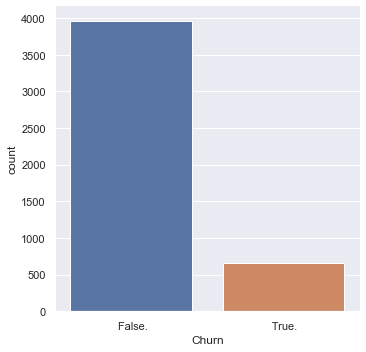

In [643]:
sns.catplot('Churn', data = churn, kind = 'count')

- In terms of class balance, we say that the target 'Churn' has imbalanced class.

In [644]:
churn.corr()

Account Length  Area Code  VMail Message  Day Mins  \
Account Length              1.000000  -0.020394      -0.012983  0.002002   
Area Code                  -0.020394   1.000000      -0.002597 -0.018900   
VMail Message              -0.012983  -0.002597       1.000000  0.009028   
Day Mins                    0.002002  -0.018900       0.009028  1.000000   
Day Calls                   0.032783  -0.013179      -0.003846 -0.002823   
Day Charge                  0.001999  -0.018903       0.009025  1.000000   
Eve Mins                   -0.006778   0.011513       0.017872 -0.010260   
Eve Calls                   0.015598  -0.011528      -0.006508  0.012990   
Eve Charge                 -0.006775   0.011533       0.017878 -0.010268   
Night Mins                 -0.002077   0.002794       0.004672  0.009604   
Night Calls                -0.009482   0.015316       0.000889  0.005165   
Night Charge               -0.002095   0.002782       0.004665  0.009591   
International Mins          0.003483  -0.007292       0.005167 -0.012314   
International Calls         0.023485  -0.011531       0.007423  0.000166   
International Charge        0.003501  -0.007386       0.005202 -0.012261   
CustServ Calls              0.002620   0.021046      -0.006951 -0.008149   

                      Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  \
Account Length         0.032783    0.001999 -0.006778   0.015598   -0.006775   
Area Code             -0.013179   -0.018903  0.011513  -0.011528    0.011533   
VMail Message         -0.003846    0.009025  0.017872  -0.006508    0.017878   
Day Mins              -0.002823    1.000000 -0.010260   0.012990   -0.010268   
Day Calls              1.000000   -0.002821 -0.006430   0.003923   -0.006429   
Day Charge            -0.002821    1.000000 -0.010255   0.012992   -0.010262   
Eve Mins              -0.006430   -0.010255  1.000000   0.001135    1.000000   
Eve Calls              0.003923    0.012992  0.001135   1.000000    0.001151   
Eve Charge            -0.006429   -0.010262  1.000000   0.001151    1.000000   
Night Mins             0.010730    0.009606 -0.018830   0.002610   -0.018839   
Night Calls           -0.013299    0.005164  0.014226  -0.015463    0.014231   
Night Charge           0.010724    0.009593 -0.018837   0.002624   -0.018846   
International Mins     0.012951   -0.012315  0.000165  -0.002798    0.000163   
International Calls    0.010889    0.000163  0.005749   0.005198    0.005751   
International Charge   0.013055   -0.012262  0.000172  -0.002831    0.000170   
CustServ Calls        -0.008747   -0.008155 -0.015598   0.007730   -0.015611   

                      Night Mins  Night Calls  Night Charge  \
Account Length         -0.002077    -0.009482     -0.002095   
Area Code               0.002794     0.015316      0.002782   
VMail Message           0.004672     0.000889      0.004665   
Day Mins                0.009604     0.005165      0.009591   
Day Calls               0.010730    -0.013299      0.010724   
Day Charge              0.009606     0.005164      0.009593   
Eve Mins               -0.018830     0.014226     -0.018837   
Eve Calls               0.002610    -0.015463      0.002624   
Eve Charge             -0.018839     0.014231     -0.018846   
Night Mins              1.000000     0.025742      0.999999   
Night Calls             0.025742     1.000000      0.025722   
Night Charge            0.999999     0.025722      1.000000   
International Mins     -0.004549    -0.006431     -0.004546   
International Calls    -0.014651     0.003294     -0.014624   
International Charge   -0.004500    -0.006439     -0.004497   
CustServ Calls         -0.013871    -0.010258     -0.013868   

                      International Mins  International Calls  \
Account Length                  0.003483             0.023485   
Area Code                      -0.007292            -0.011531   
VMail Message                   0.005167             0.007423   
Day Mins                       -0.01

- Following two plots are showing the correaltion between all parameters of the dataset

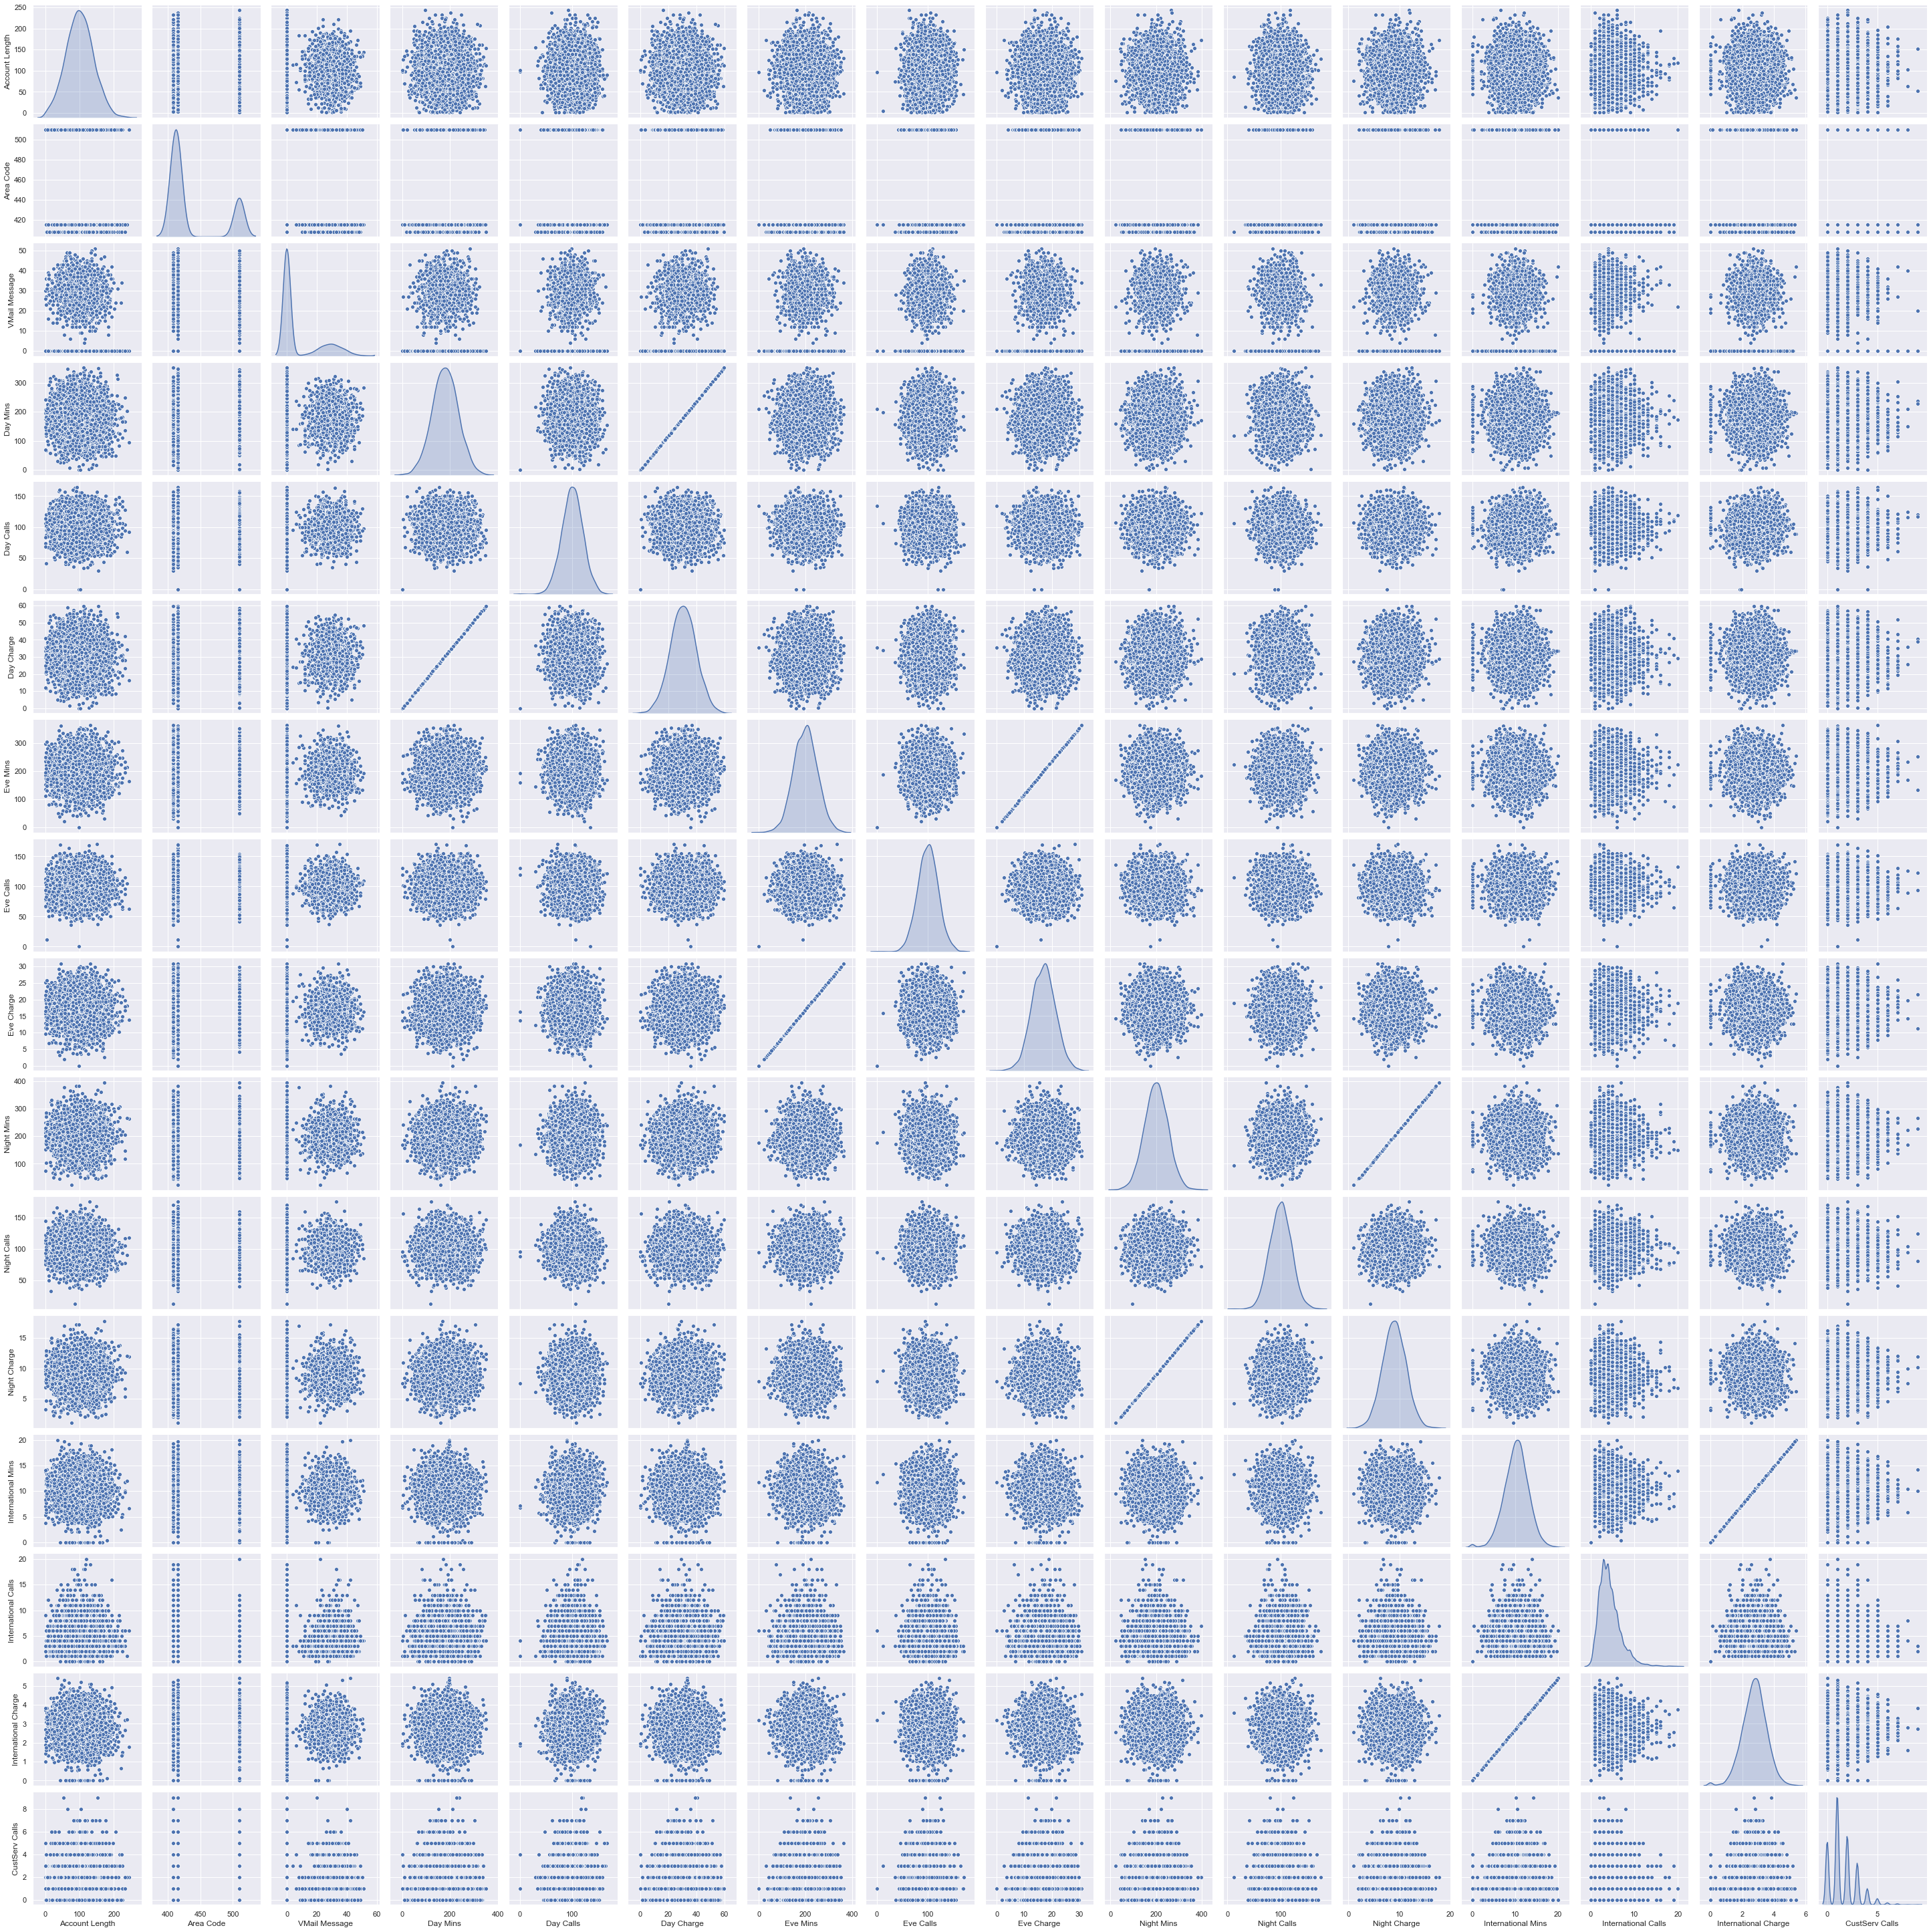

In [645]:
sns.pairplot(churn, diag_kind='kde')

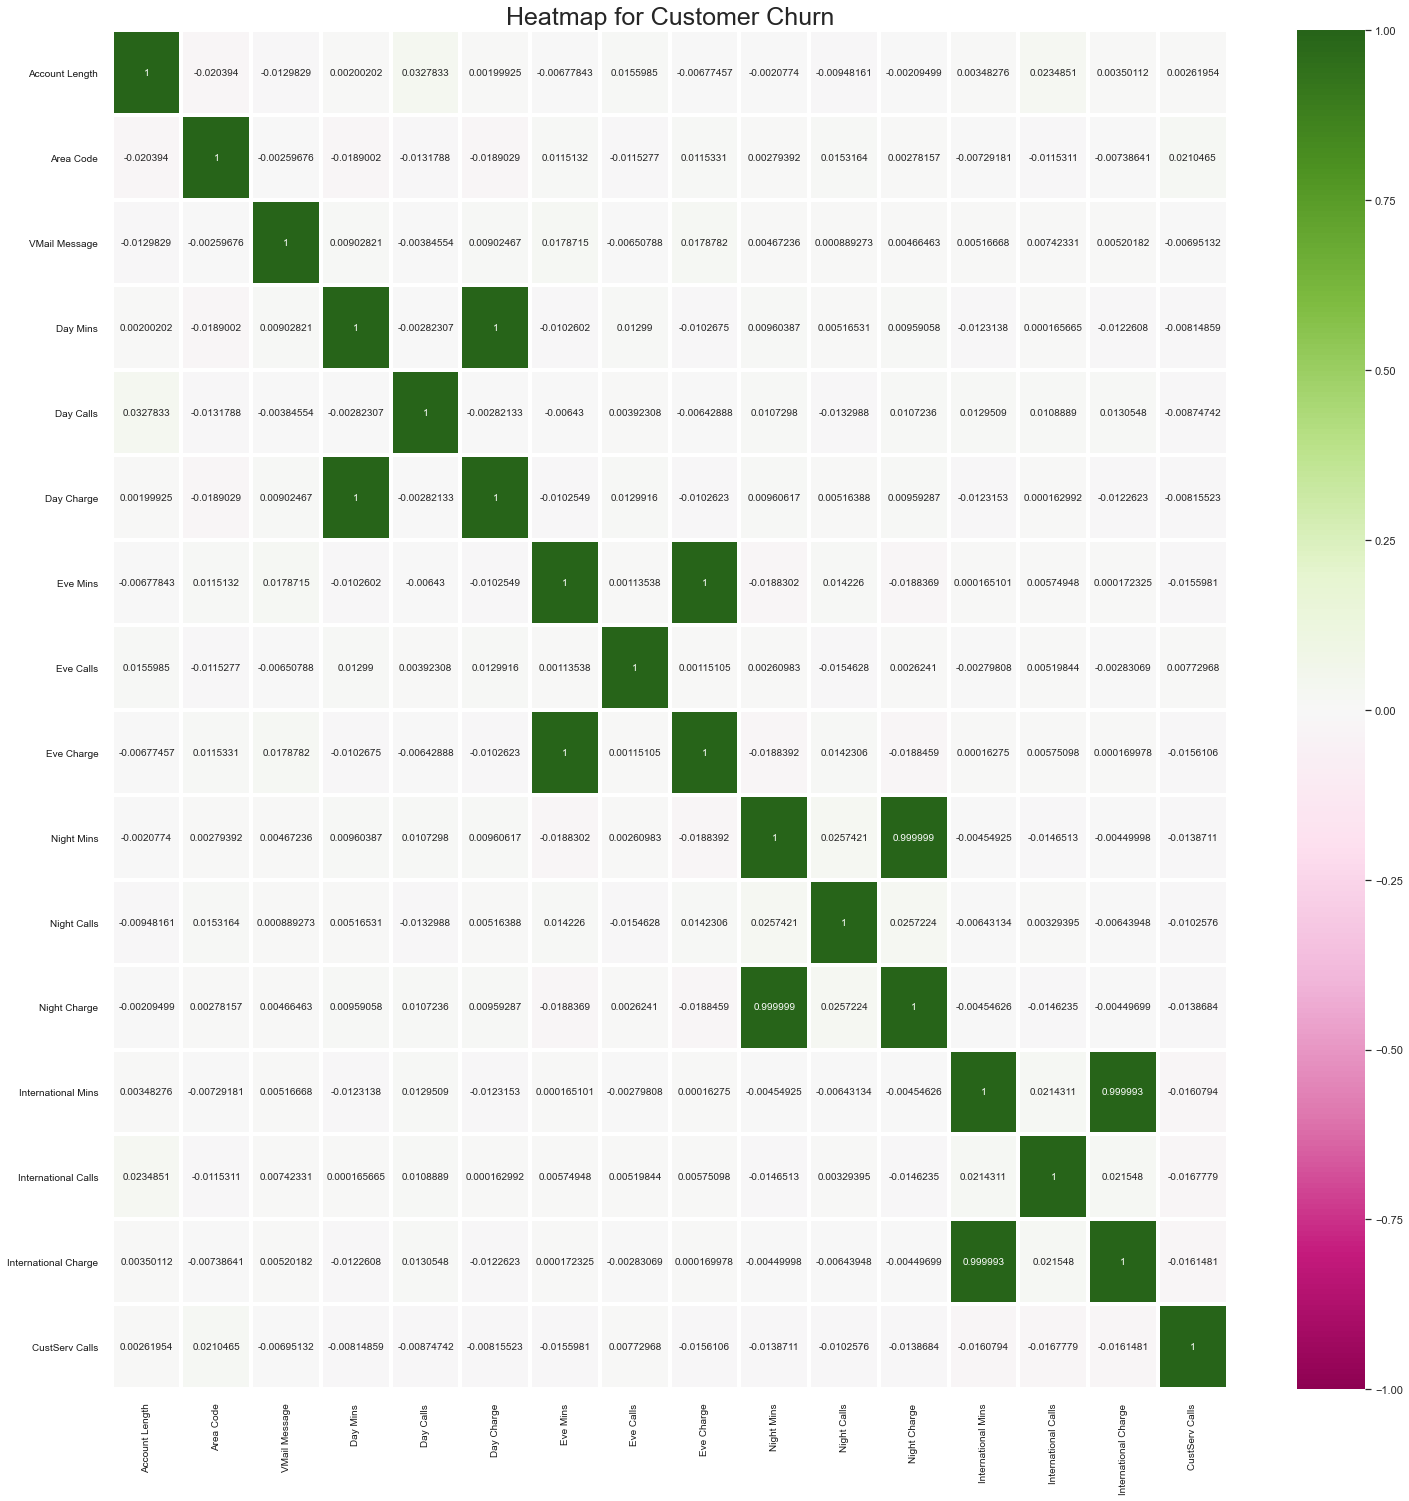

In [646]:
c = churn.corr()
plt.figure(figsize=(25,25))
ax = sns.heatmap(c,
            vmin=-1,
            vmax=1,
            cmap='PiYG',
            annot=True,
            fmt = 'n',
            linewidths=3)
ax.tick_params(axis='both', size = 10, labelsize = 10, labelcolor = 'k')
plt.title("Heatmap for Customer Churn", fontsize = 25)
plt.show()

- How many Customers are using an international plan

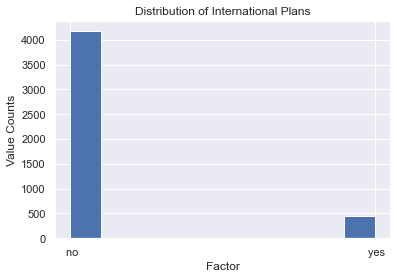

In [647]:
plt.hist(churn['International Plan'])
plt.title("Distribution of International Plans")
plt.ylabel("Value Counts")
plt.xlabel("Factor")
plt.show()

- How many Customers are using voice mail plan

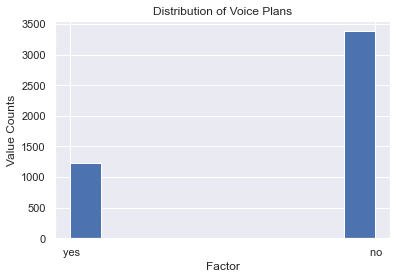

In [648]:
plt.hist(churn['VMail Plan'])
plt.title("Distribution of Voice Plans")
plt.ylabel("Value Counts")
plt.xlabel("Factor")
plt.show()

- How many Customers are using voice mail message

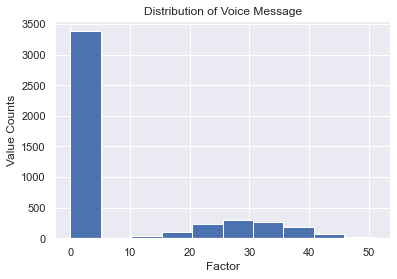

In [649]:
plt.hist(churn['VMail Message'])
plt.title("Distribution of Voice Message")
plt.ylabel("Value Counts")
plt.xlabel("Factor")
plt.show()

- How many Customers will Churn

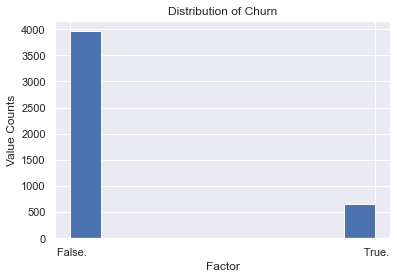

In [650]:
plt.hist(churn['Churn'])
plt.title("Distribution of Churn")
plt.ylabel("Value Counts")
plt.xlabel("Factor")
plt.show()

- Total Minutes of ALL Calls

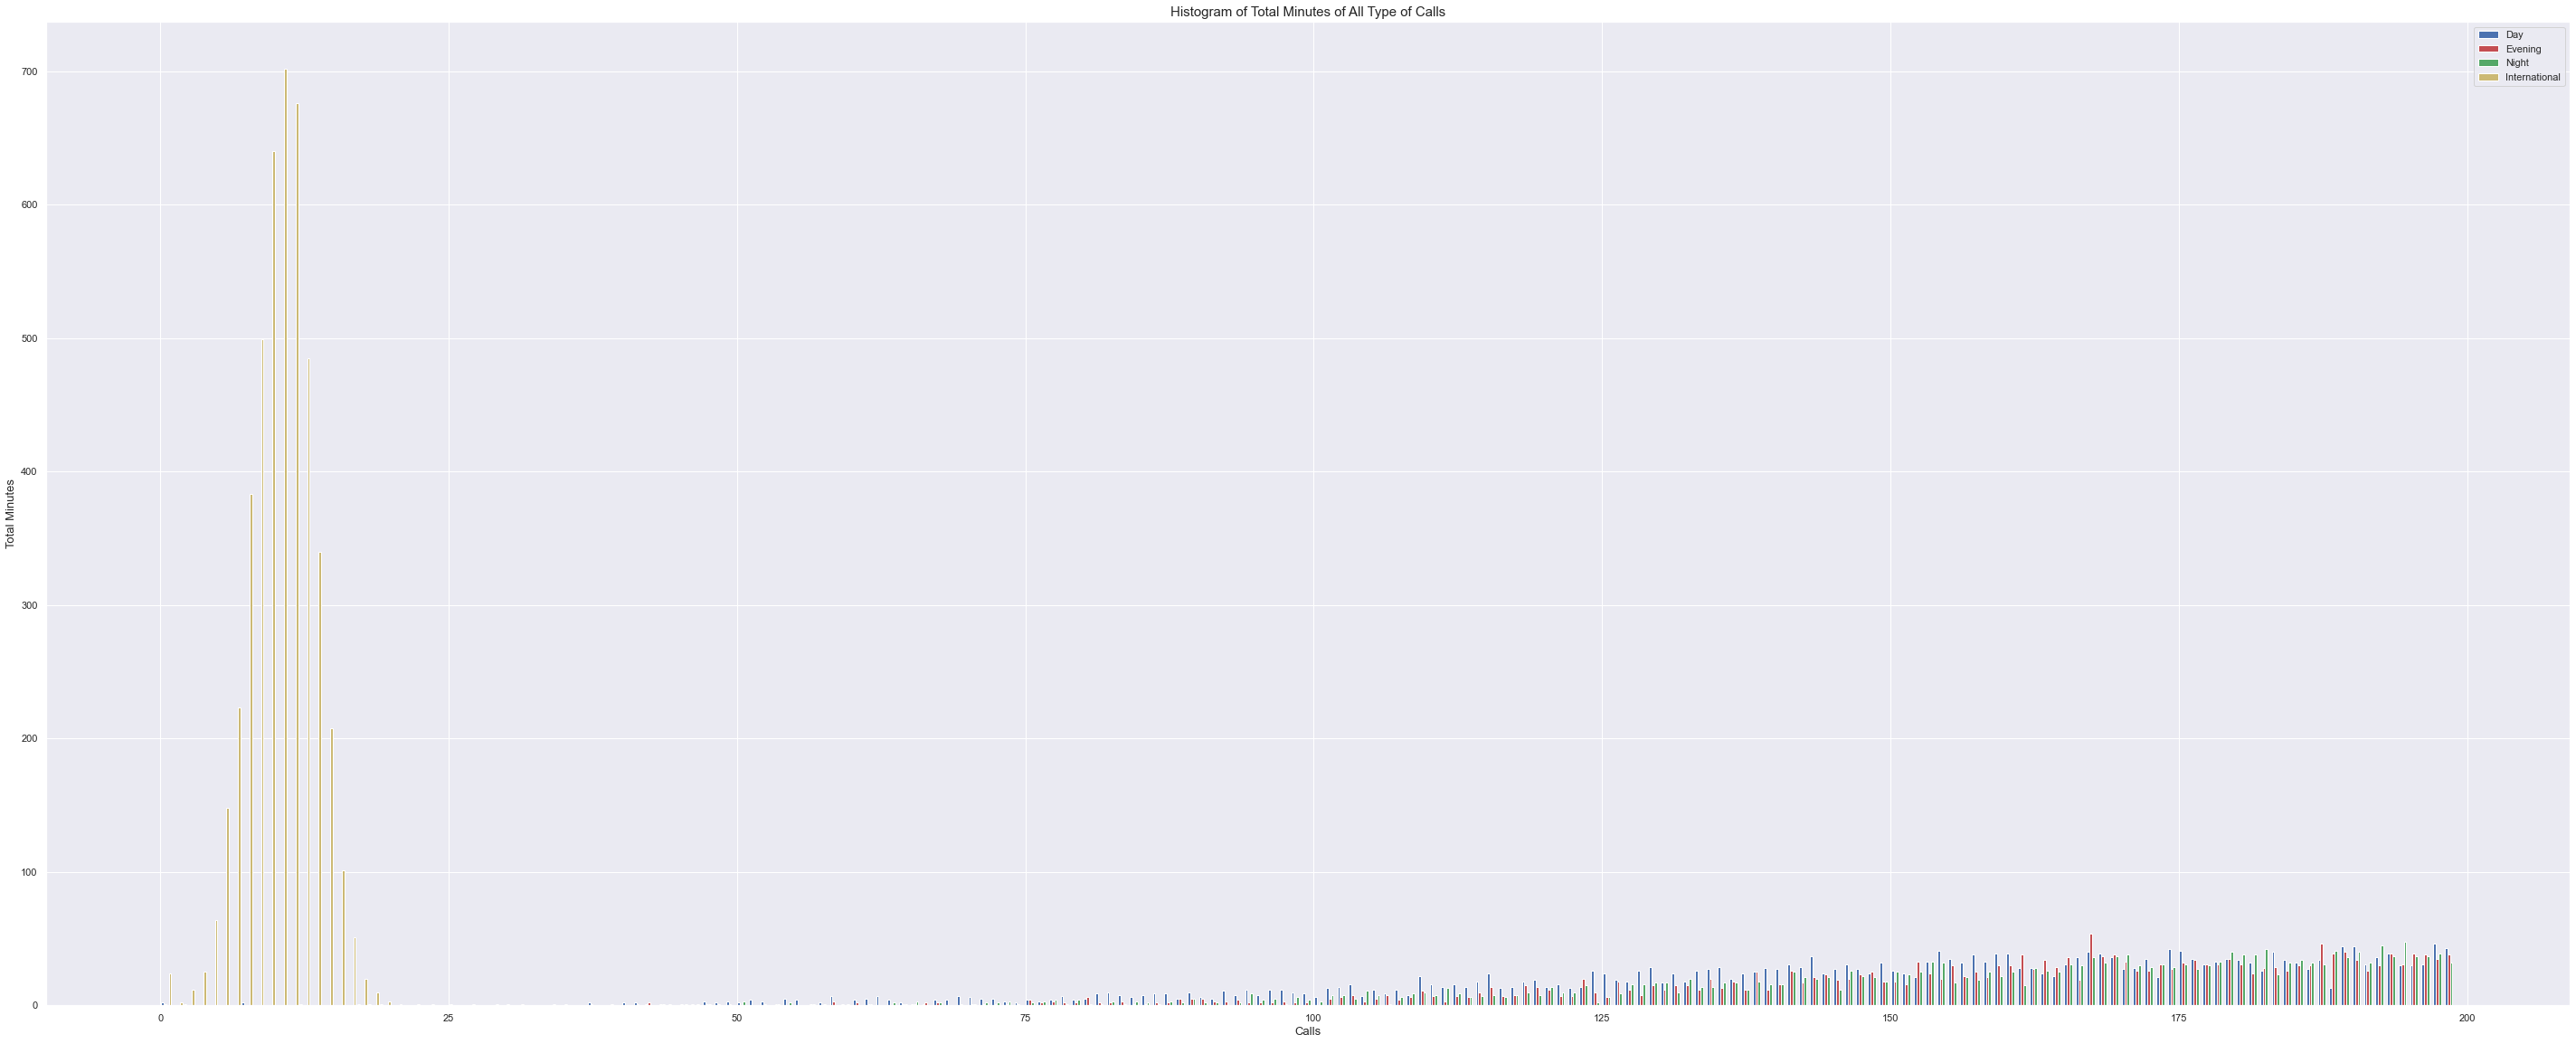

In [651]:
bins = np.arange(200)
plt.figure(figsize=(50,20))
plt.hist([churn['Day Mins'],churn['Eve Mins'],churn['Night Mins'],churn['International Mins']],
         bins,
         histtype='bar',
         orientation='vertical',
         rwidth=0.9,
         label=["Day","Evening","Night","International"],
         color=['b','r','g','y'],
)
plt.xlabel("Calls", fontsize = 13)
plt.ylabel("Total Minutes", fontsize = 13)
plt.title("Histogram of Total Minutes of All Type of Calls", fontsize = 15)
plt.legend()
plt.show()

- Total No of All Calls

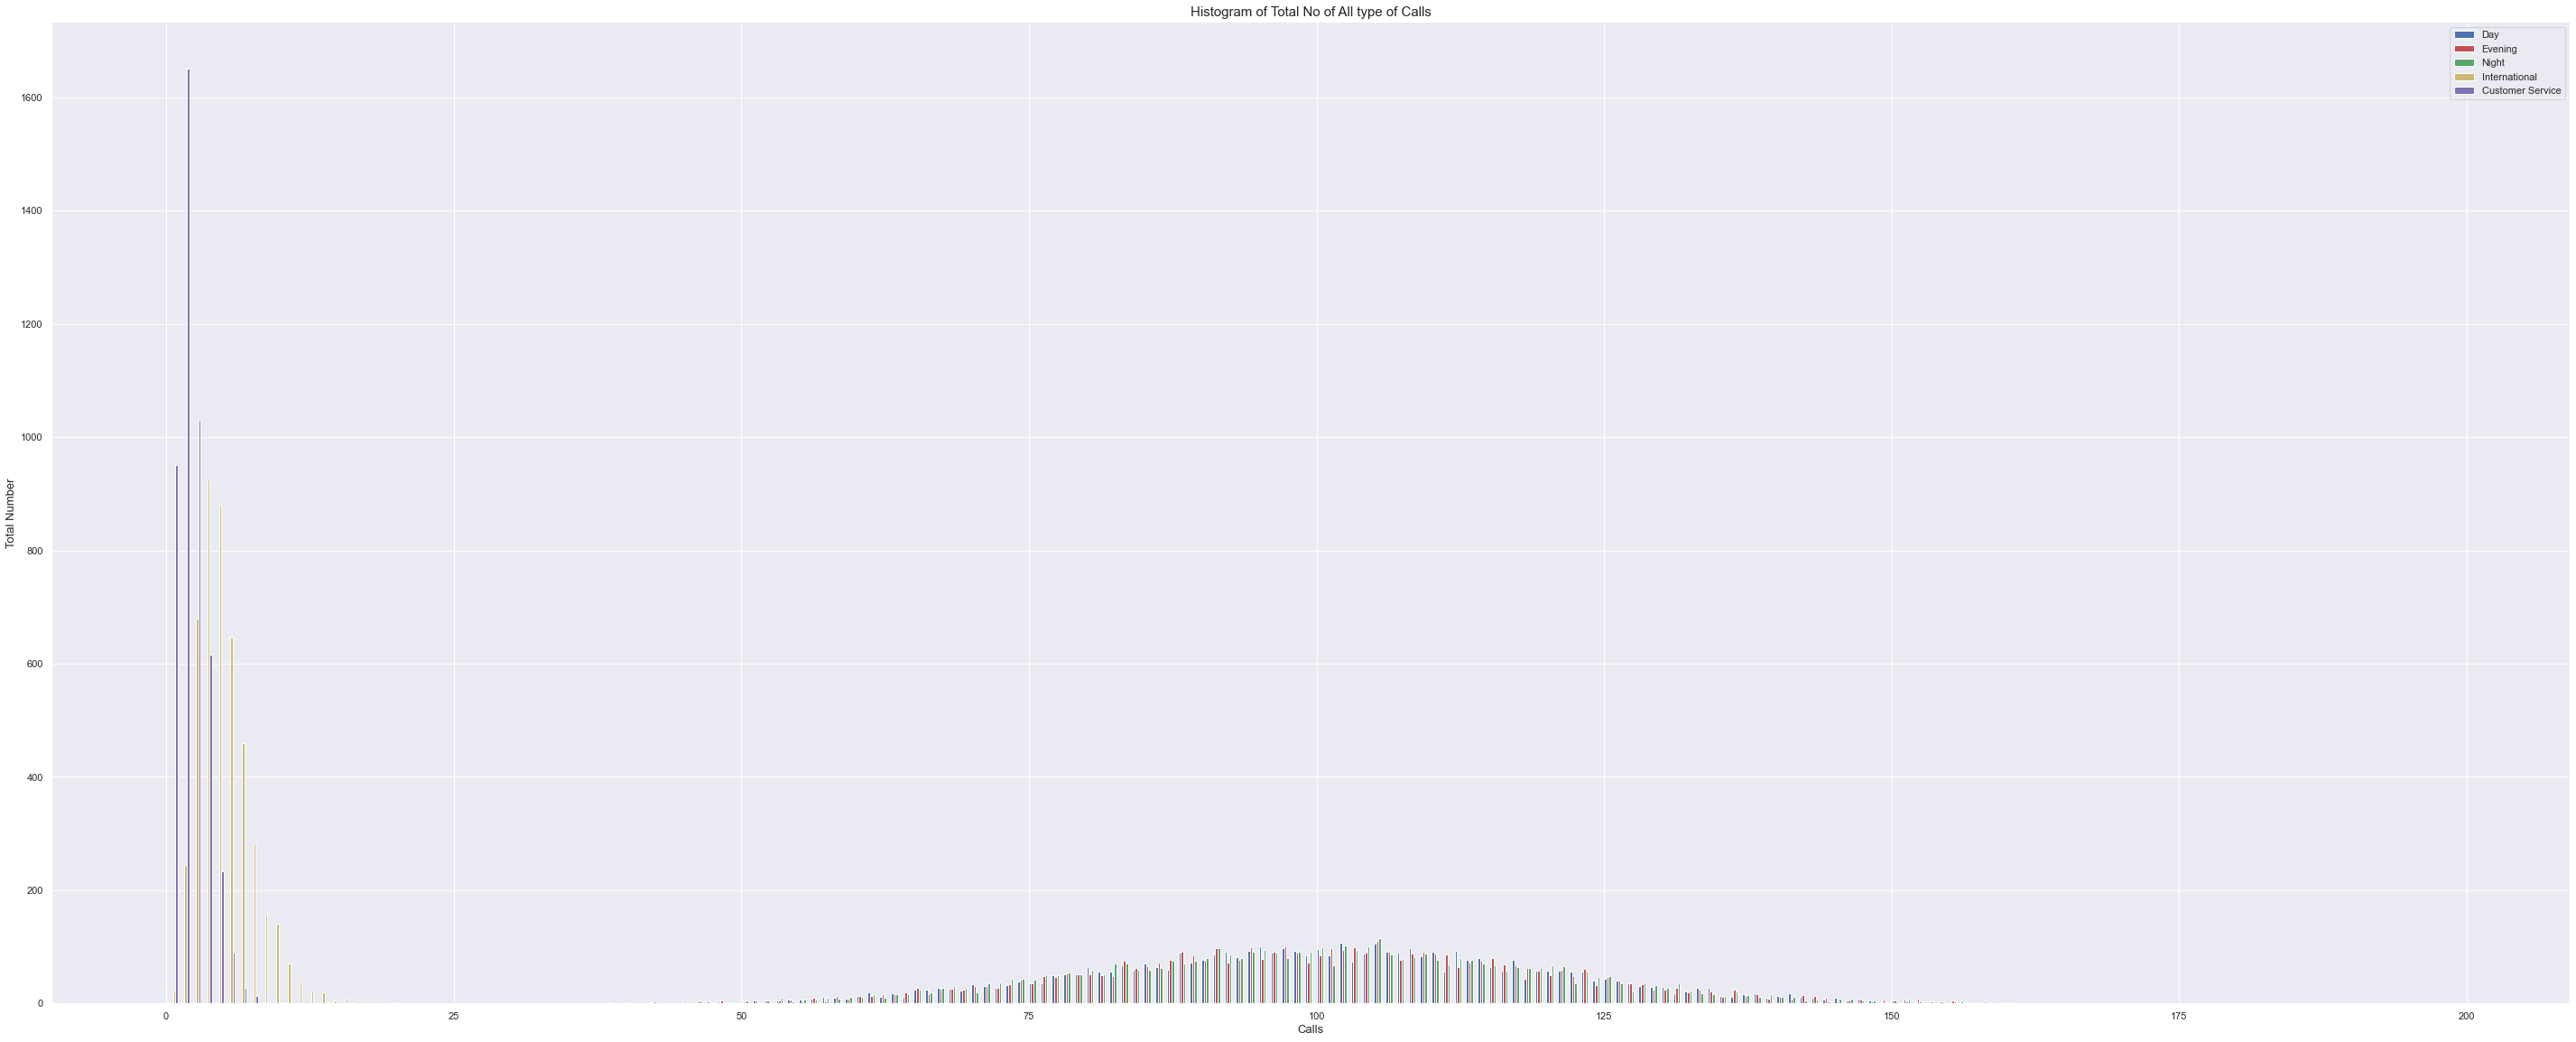

In [652]:
bins = np.arange(200)
plt.figure(figsize=(50,20))
plt.hist([churn['Day Calls'],churn['Eve Calls'],churn['Night Calls'],churn['International Calls'],churn['CustServ Calls']],
         bins,
         histtype='bar',
         orientation='vertical',
         rwidth=1,
         label=["Day","Evening","Night","International","Customer Service"],
         color=['b','r','g','y','m'],
)
plt.xlabel("Calls", fontsize = 13)
plt.ylabel("Total Number", fontsize = 13)
plt.title("Histogram of Total No of All type of Calls", fontsize = 15)
plt.legend()
plt.show()

- Total Charges of All Calls

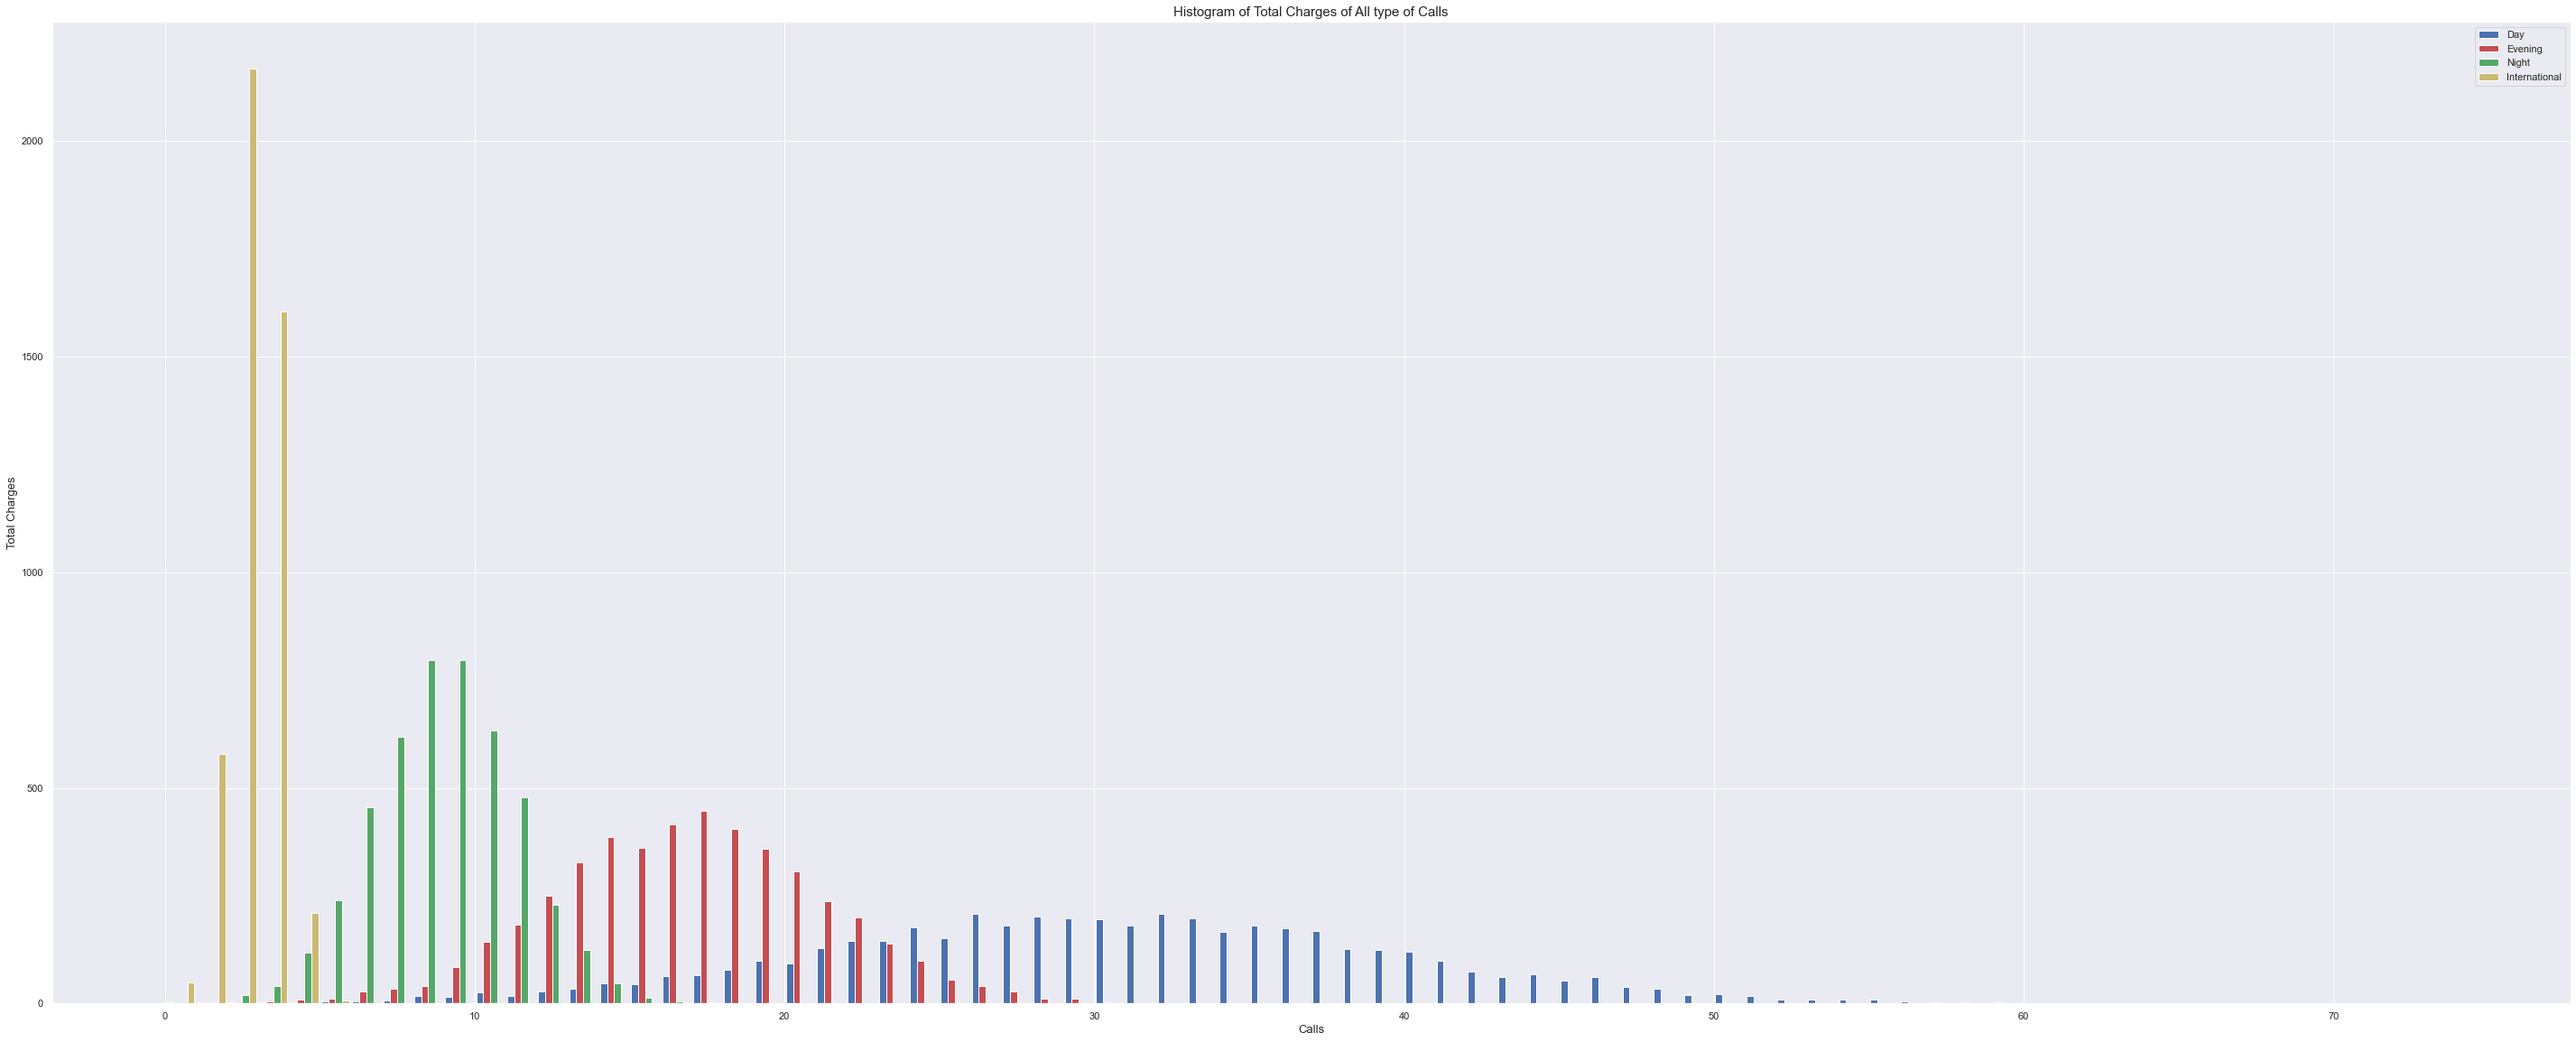

In [653]:
bins = np.arange(75)
plt.figure(figsize=(50,20))
plt.hist([churn['Day Charge'],churn['Eve Charge'],churn['Night Charge'],churn['International Charge']],
         bins,
         histtype='bar',
         orientation='vertical',
         rwidth=0.9,
         label=["Day","Evening","Night","International"],
         color=['b','r','g','y'],
)
plt.xlabel("Calls", fontsize = 13)
plt.ylabel("Total Charges", fontsize = 13)
plt.title("Histogram of Total Charges of All type of Calls", fontsize = 15)
plt.legend()
plt.show()

- Churn for All type of Calls

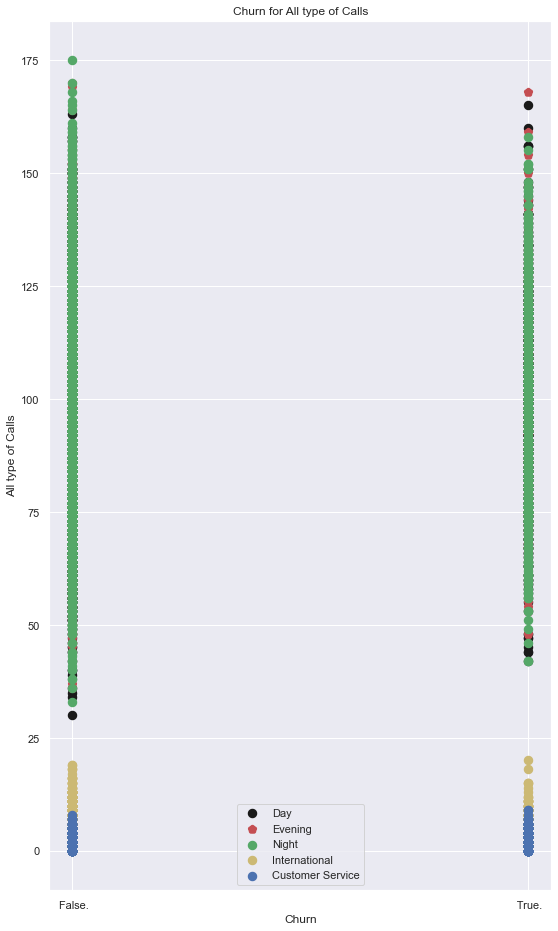

In [654]:
plt.figure(figsize=(9,16))
x = churn['Churn']
p = churn['Day Calls']
q = churn['Eve Calls']
r = churn['Night Calls']
s = churn['International Calls']
t = churn['CustServ Calls']
plt.xlabel("Churn")
plt.ylabel("All type of Calls")
plt.title("Churn for All type of Calls")
plt.scatter(x, p, c = 'k',marker = 'o', s = 20, linewidths = 5, label = "Day")
plt.scatter(x, q, c = 'r',marker = '*', s = 20, linewidths = 5, label = "Evening")
plt.scatter(x, r, c = 'g',marker = 'o', s = 20, linewidths = 5, label = "Night")
plt.scatter(x, s, c = 'y',marker = 'o', s = 20, linewidths = 5, label = "International")
plt.scatter(x, t, c = 'b',marker = 'o', s = 20, linewidths = 5, label = "Customer Service")
plt.legend()
plt.show()

- Churn for All State

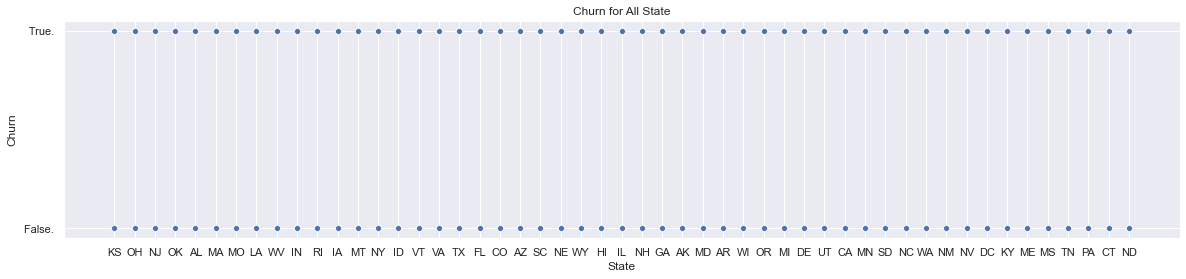

In [655]:
plt.figure(figsize=(20,4))
x = churn['State']
y = churn['Churn']
plt.xlabel("Churn")
plt.ylabel("State")
plt.title("Churn for All State")
sns.scatterplot(x, y)
plt.show()

### Data Cleaning and Preprocessing

#####  Remove Unwanted Columns 

In [656]:
churn.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

- Unwanted Columns are't Present

#####  Impute Missing Values

In [657]:
churn.isnull().sum()

State                   0
Account Length          0
Area Code               0
Phone                   0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International Calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

- Missing Value aren't Present

##### Impuating missing values for categorical feature

In [658]:
cat = churn.select_dtypes(include='object')
cat

State      Phone International Plan VMail Plan    Churn
0       KS   382-4657                 no        yes   False.
1       OH   371-7191                 no        yes   False.
2       NJ   358-1921                 no         no   False.
3       OH   375-9999                yes         no   False.
4       OK   330-6626                yes         no   False.
...    ...        ...                ...        ...      ...
4612    NY   345-7512                 no        yes   False.
4613    NM   343-6820                 no        yes   False.
4614    VT   338-4794                 no        yes   False.
4615    MI   355-8388                 no        yes   False.
4616    IN   409-6884                 no         no   False.

[4617 rows x 5 columns]

In [659]:
cat.isnull().sum()

State                 0
Phone                 0
International Plan    0
VMail Plan            0
Churn                 0
dtype: int64

- Missing or NaN values in Categorical Features aren't Present

##### Converting Categorical Feature into Numerical

In [660]:
cat['International Plan'].value_counts()

 no     4171
 yes     446
Name: International Plan, dtype: int64

In [661]:
cat['VMail Plan'].value_counts()

 no     3381
 yes    1236
Name: VMail Plan, dtype: int64

In [662]:
cat['Churn'].value_counts()

 False.    3961
 True.      656
Name: Churn, dtype: int64

- Since above categorical feature contains only two type of values
- Hence, We use Label Encoder for converting categorical feature into numerical

In [663]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
cat['International Plan'] = enc.fit_transform(cat['International Plan'])
cat['VMail Plan'] = enc.fit_transform(cat['VMail Plan'])
cat['Churn'] = enc.fit_transform(cat['Churn'])
cat

<ipython-input-663-1ea345c5ddb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['International Plan'] = enc.fit_transform(cat['International Plan'])
<ipython-input-663-1ea345c5ddb2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['VMail Plan'] = enc.fit_transform(cat['VMail Plan'])
<ipython-input-663-1ea345c5ddb2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

State      Phone  International Plan  VMail Plan  Churn
0       KS   382-4657                   0           1      0
1       OH   371-7191                   0           1      0
2       NJ   358-1921                   0           0      0
3       OH   375-9999                   1           0      0
4       OK   330-6626                   1           0      0
...    ...        ...                 ...         ...    ...
4612    NY   345-7512                   0           1      0
4613    NM   343-6820                   0           1      0
4614    VT   338-4794                   0           1      0
4615    MI   355-8388                   0           1      0
4616    IN   409-6884                   0           0      0

[4617 rows x 5 columns]

##### Replacing NaN values for Numeric feature

In [664]:
# Selecting numeric feature from dataset
numeric = ['int16','int32','int64','float16','float32','float64']
num = churn.select_dtypes(include=numeric)
num

Account Length  Area Code  VMail Message  Day Mins  Day Calls  \
0                128        415             25     265.1        110   
1                107        415             26     161.6        123   
2                137        415              0     243.4        114   
3                 84        408              0     299.4         71   
4                 75        415              0     166.7        113   
...              ...        ...            ...       ...        ...   
4612              57        510             25     144.0         81   
4613             177        408             29     189.0         91   
4614              67        408             33     127.5        126   
4615              98        415             23     168.9         98   
4616             140        415              0     204.7        100   

      Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  \
0          45.07     197.4         99       16.78       244.7           91   
1          27.47     195.5        103       16.62       254.4          103   
2          41.38     121.2        110       10.30       162.6          104   
3          50.90      61.9         88        5.26       196.9           89   
4          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4612       24.48     187.2        112       15.91       158.6          122   
4613       32.13     303.1         96       25.76       163.6          116   
4614       21.68     296.1        129       25.17       200.9           91   
4615       28.71     226.3        117       19.24       165.5           96   
4616       34.80     126.8        107       10.78       202.8          115   

      Night Charge  International Mins  International Calls  \
0            11.01                10.0                    3   
1            11.45                13.7                    3   
2             7.32                12.2                    5   
3             8.86                 6.6                    7   
4             8.41                10.1                    3   
...            ...                 ...                  ...   
4612          7.14                 8.5                    6   
4613          7.36                15.7                    1   
4614          9.04                13.0                    3   
4615          7.45                14.3                    3   
4616          9.13                12.1                    4   

      International Charge  CustServ Calls  
0                     2.70               1  
1                     3.70               1  
2                     3.29               0  
3                     1.78               2  
4                     2.73               3  
...                    ...             ...  
4612                  2.30               3  
4613                  4.24               3  
4614                  3.51               1  
4615                  3.86               0  
4616                  3.27               2  

[4617 rows x 16 columns]

In [665]:
num.isnull().sum().sum()

0

- NaN Value aren't Present

#####  Outlier Detection 

In [666]:
from scipy import stats
# Calculating Z_score
z_score = np.abs(stats.zscore(num))
z_score

array([[0.69090094, 0.52139206, 1.26188457, ..., 0.58348728, 0.10200542,
        0.43388538],
       [0.16050289, 0.52139206, 1.33546342, ..., 0.58348728, 1.24148062,
        0.43388538],
       [0.91821439, 0.52139206, 0.57758685, ..., 0.23039815, 0.69065134,
        1.19906826],
       ...,
       [0.84977911, 0.68694075, 1.85051542, ..., 0.58348728, 0.98621827,
        0.43388538],
       [0.06681056, 0.52139206, 1.11472685, ..., 0.58348728, 1.45643839,
        1.19906826],
       [0.99398554, 0.52139206, 0.57758685, ..., 0.17654456, 0.66378162,
        0.3312975 ]])

In [667]:
# Set threshold
threshold=3

In [668]:
# Detecting Outliers
out= np.where(z_score > threshold)
out

(array([  22,   32,   32,   41,   58,  115,  115,  179,  179,  182,  185,
         219,  244,  244,  272,  301,  314,  314,  329,  332,  343,  343,
         365,  365,  377,  397,  397,  416,  468,  474,  483,  488,  488,
         493,  504,  514,  522,  533,  533,  542,  595,  595,  636,  642,
         646,  674,  692,  694,  712,  712,  721,  740,  756,  762,  762,
         778,  817,  821,  821,  837,  845,  854,  863,  878,  878,  883,
         883,  883,  889,  889,  902,  908,  921,  922,  922,  957,  960,
         974,  982,  985,  985, 1021, 1028, 1028, 1052, 1052, 1080, 1080,
        1092, 1113, 1113, 1121, 1142, 1144, 1179, 1233, 1233, 1238, 1238,
        1260, 1260, 1273, 1317, 1317, 1325, 1333, 1345, 1345, 1345, 1355,
        1392, 1397, 1397, 1397, 1400, 1400, 1407, 1408, 1419, 1445, 1445,
        1460, 1502, 1551, 1564, 1564, 1567, 1596, 1615, 1638, 1694, 1751,
        1831, 1865, 1886, 1889, 1912, 1919, 1966, 1966, 1986, 1986, 1989,
        2001, 2212, 2223, 2252, 2252, 

In [669]:
# Create dataframe for Outliers 
outlier = pd.DataFrame(out).T
outlier.columns = ['Row','Column']

In [670]:
outlier

Row  Column
0      22      13
1      32       6
2      32       8
3      41      13
4      58       7
..    ...     ...
311  4508      10
312  4537      15
313  4562       4
314  4564       6
315  4564       8

[316 rows x 2 columns]

In [671]:
outlier.Column.value_counts()

13    69
15    45
14    35
12    35
11    15
9     15
10    14
8     14
6     14
4     13
5     11
3     11
0     11
7      8
2      6
Name: Column, dtype: int64

In [672]:
num.columns

Index(['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'International Mins',
       'International Calls', 'International Charge', 'CustServ Calls'],
      dtype='object')

- All Column Contains Outliers except 'Area Code'

##### Outliers Visualization and Treating

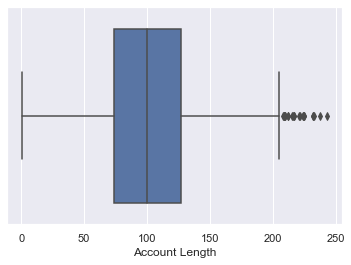

In [673]:
# plotting boxplot for all outliers
sns.set(style="darkgrid")
sns.boxplot(x=num['Account Length'])

In [674]:
Q1,Q3 = np.percentile(num['Account Length'],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
acc_len = num['Account Length'].mean()
print("Mean Value of Account Length Feature = ",acc_len)

Q1 =  74.0
Q2 =  127.0
IQR =  53.0
Lower Bound =  -5.5
Upper Bound =  206.5
Mean Value of Account Length Feature =  100.64522417153997


In [675]:
num['Account Length'] = np.where(num['Account Length'] < -5.5, 100.64,num['Account Length'])
num['Account Length'] = np.where(num['Account Length'] > 206.5, 100.64,num['Account Length'])

<ipython-input-675-f6d66dec9f8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Account Length'] = np.where(num['Account Length'] < -5.5, 100.64,num['Account Length'])
<ipython-input-675-f6d66dec9f8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Account Length'] = np.where(num['Account Length'] > 206.5, 100.64,num['Account Length'])


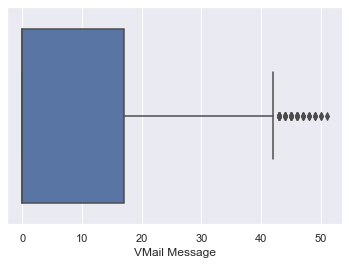

In [676]:
sns.boxplot(x=num['VMail Message'])

In [677]:
Q1,Q3 = np.percentile(num['VMail Message'],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
Vmail = num['VMail Message'].mean()
print("Mean Value of VMail Message Feature = ",Vmail)

Q1 =  0.0
Q2 =  17.0
IQR =  17.0
Lower Bound =  -25.5
Upper Bound =  42.5
Mean Value of VMail Message Feature =  7.849902534113061


In [678]:
num['VMail Message'] = np.where(num['VMail Message'] < -25.5, 7.84,num['VMail Message'])
num['VMail Message'] = np.where(num['VMail Message'] > 42.5, 7.84,num['VMail Message'])

<ipython-input-678-8407514bbfc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['VMail Message'] = np.where(num['VMail Message'] < -25.5, 7.84,num['VMail Message'])
<ipython-input-678-8407514bbfc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['VMail Message'] = np.where(num['VMail Message'] > 42.5, 7.84,num['VMail Message'])


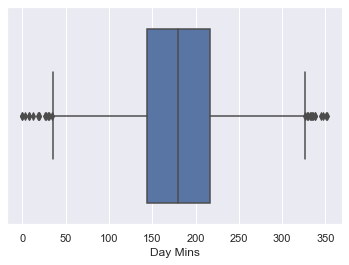

In [679]:
sns.boxplot(x=num['Day Mins'])

In [680]:
Q1,Q3 = np.percentile(num['Day Mins'],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
day_min = num['Day Mins'].mean()
print("Mean Value of Day Mins Feature = ",day_min)

Q1 =  143.7
Q2 =  216.8
IQR =  73.10000000000002
Lower Bound =  34.049999999999955
Upper Bound =  326.45000000000005
Mean Value of Day Mins Feature =  180.44715183019264


In [681]:
num['Day Mins'] = np.where(num['Day Mins'] < 34.04, 180.44,num['Day Mins'])
num['Day Mins'] = np.where(num['Day Mins'] > 326.45, 180.44,num['Day Mins'])

<ipython-input-681-29e716cab7bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Day Mins'] = np.where(num['Day Mins'] < 34.04, 180.44,num['Day Mins'])
<ipython-input-681-29e716cab7bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Day Mins'] = np.where(num['Day Mins'] > 326.45, 180.44,num['Day Mins'])


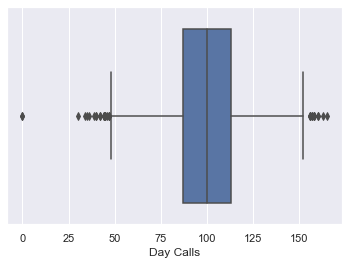

In [682]:
sns.boxplot(x=num['Day Calls'])

In [683]:
Q1,Q3 = np.percentile(num['Day Calls'],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
day_cal = num['Day Calls'].mean()
print("Mean Value of Day Calls Feature = ",day_cal)

Q1 =  87.0
Q2 =  113.0
IQR =  26.0
Lower Bound =  48.0
Upper Bound =  152.0
Mean Value of Day Calls Feature =  100.0543643058263


In [684]:
num['Day Calls'] = np.where(num['Day Calls'] < 48, 100.05,num['Day Calls'])
num['Day Calls'] = np.where(num['Day Calls'] > 152, 100.05,num['Day Calls'])

<ipython-input-684-2d1d0c004fec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Day Calls'] = np.where(num['Day Calls'] < 48, 100.05,num['Day Calls'])
<ipython-input-684-2d1d0c004fec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Day Calls'] = np.where(num['Day Calls'] > 152, 100.05,num['Day Calls'])


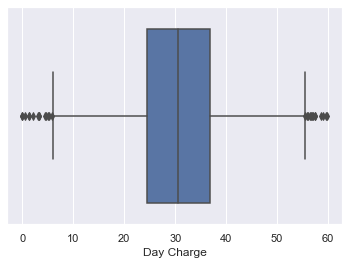

In [685]:
sns.boxplot(x=num['Day Charge'])

In [686]:
Q1,Q3 = np.percentile(num['Day Charge'],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
day_chr = num['Day Charge'].mean()
print("Mean Value of Day Charge Feature = ",day_chr)

Q1 =  24.43
Q2 =  36.86
IQR =  12.43
Lower Bound =  5.785
Upper Bound =  55.504999999999995
Mean Value of Day Charge Feature =  30.676575698505562


In [687]:
num['Day Charge'] = np.where(num['Day Charge'] < 5.78, 30.67,num['Day Charge'])
num['Day Charge'] = np.where(num['Day Charge'] > 55.50, 30.67,num['Day Charge'])

<ipython-input-687-365c75c904ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Day Charge'] = np.where(num['Day Charge'] < 5.78, 30.67,num['Day Charge'])
<ipython-input-687-365c75c904ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Day Charge'] = np.where(num['Day Charge'] > 55.50, 30.67,num['Day Charge'])


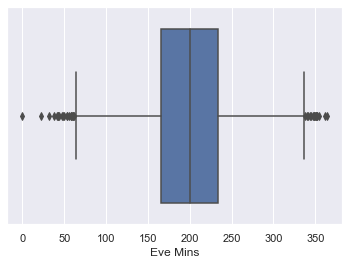

In [688]:
sns.boxplot(x=num['Eve Mins'])

In [689]:
Q1,Q3 = np.percentile(num['Eve Mins'],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
eve_min = num['Eve Mins'].mean()
print("Mean Value of Eve Mins Feature = ",eve_min)

Q1 =  165.9
Q2 =  234.0
IQR =  68.1
Lower Bound =  63.750000000000014
Upper Bound =  336.15
Mean Value of Eve Mins Feature =  200.4290881524801


In [690]:
num['Eve Mins'] = np.where(num['Eve Mins'] < 63.75, 200.42,num['Eve Mins'])
num['Eve Mins'] = np.where(num['Eve Mins'] > 336.15, 200.42,num['Eve Mins'])

<ipython-input-690-229e74f38479>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Eve Mins'] = np.where(num['Eve Mins'] < 63.75, 200.42,num['Eve Mins'])
<ipython-input-690-229e74f38479>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Eve Mins'] = np.where(num['Eve Mins'] > 336.15, 200.42,num['Eve Mins'])


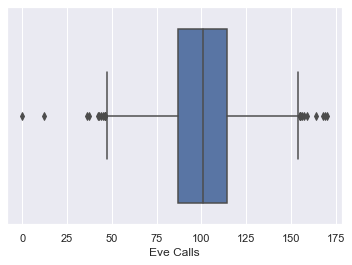

In [691]:
sns.boxplot(x=num['Eve Calls'])

In [692]:
Q1,Q3 = np.percentile(num['Eve Calls'],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
eve_cal = num['Eve Calls'].mean()
print("Mean Value of Eve Calls Feature = ",eve_cal)

Q1 =  87.0
Q2 =  114.0
IQR =  27.0
Lower Bound =  46.5
Upper Bound =  154.5
Mean Value of Eve Calls Feature =  100.17977041368854


In [693]:
num['Eve Calls'] = np.where(num['Eve Calls'] < 46.5, 100.17,num['Eve Calls'])
num['Eve Calls'] = np.where(num['Eve Calls'] > 154.5, 100.17,num['Eve Calls'])

<ipython-input-693-951c55cde55a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Eve Calls'] = np.where(num['Eve Calls'] < 46.5, 100.17,num['Eve Calls'])
<ipython-input-693-951c55cde55a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Eve Calls'] = np.where(num['Eve Calls'] > 154.5, 100.17,num['Eve Calls'])


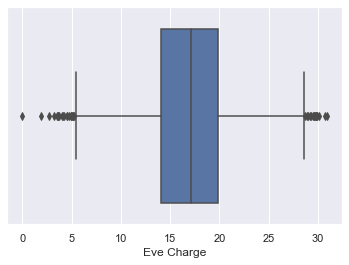

In [694]:
sns.boxplot(x=num['Eve Charge'])

In [695]:
Q1,Q3 = np.percentile(num['Eve Charge'],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
eve_chr = num['Eve Charge'].mean()
print("Mean Value of Eve Charge Feature = ",eve_chr)

Q1 =  14.1
Q2 =  19.89
IQR =  5.790000000000001
Lower Bound =  5.414999999999997
Upper Bound =  28.575000000000003
Mean Value of Eve Charge Feature =  17.03670348711283


In [696]:
num['Eve Charge'] = np.where(num['Eve Charge'] < 5.41, 17.03,num['Eve Charge'])
num['Eve Charge'] = np.where(num['Eve Charge'] > 28.57, 17.03,num['Eve Charge'])

<ipython-input-696-74ed15d8c782>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Eve Charge'] = np.where(num['Eve Charge'] < 5.41, 17.03,num['Eve Charge'])
<ipython-input-696-74ed15d8c782>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Eve Charge'] = np.where(num['Eve Charge'] > 28.57, 17.03,num['Eve Charge'])


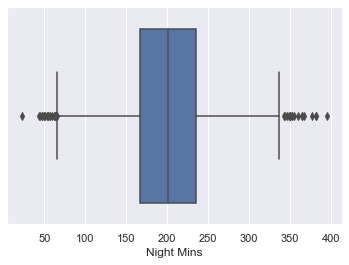

In [697]:
sns.boxplot(x=num['Night Mins'])

In [698]:
Q1,Q3 = np.percentile(num['Night Mins'],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
nt_min = num['Night Mins'].mean()
print("Mean Value of Night Mins Feature = ",nt_min)

Q1 =  167.1
Q2 =  234.9
IQR =  67.80000000000001
Lower Bound =  65.39999999999998
Upper Bound =  336.6
Mean Value of Night Mins Feature =  200.6239332900154


In [699]:
num['Night Mins'] = np.where(num['Night Mins'] < 65.39, 200.62,num['Night Mins'])
num['Night Mins'] = np.where(num['Night Mins'] > 336.6, 200.62,num['Night Mins'])

<ipython-input-699-49246c171ab5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Night Mins'] = np.where(num['Night Mins'] < 65.39, 200.62,num['Night Mins'])
<ipython-input-699-49246c171ab5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Night Mins'] = np.where(num['Night Mins'] > 336.6, 200.62,num['Night Mins'])


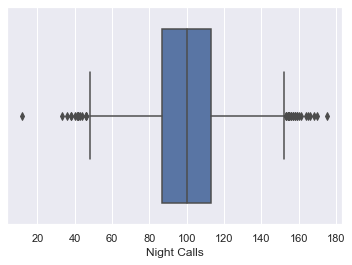

In [700]:
sns.boxplot(x=num['Night Calls'])

In [701]:
Q1,Q3 = np.percentile(num['Night Calls'],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
nt_cal = num['Night Calls'].mean()
print("Mean Value of Night Calls Feature = ",nt_cal)

Q1 =  87.0
Q2 =  113.0
IQR =  26.0
Lower Bound =  48.0
Upper Bound =  152.0
Mean Value of Night Calls Feature =  99.94411955815464


In [702]:
num['Night Calls'] = np.where(num['Night Calls'] < 48, 99.94,num['Night Calls'])
num['Night Calls'] = np.where(num['Night Calls'] > 152, 99.94,num['Night Calls'])

<ipython-input-702-f3039ed01d2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Night Calls'] = np.where(num['Night Calls'] < 48, 99.94,num['Night Calls'])
<ipython-input-702-f3039ed01d2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Night Calls'] = np.where(num['Night Calls'] > 152, 99.94,num['Night Calls'])


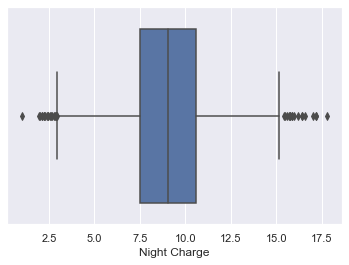

In [703]:
sns.boxplot(x=num['Night Charge'])

In [704]:
Q1,Q3 = np.percentile(num['Night Charge'],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
nt_chr = num['Night Charge'].mean()
print("Mean Value of Night Charge Feature = ",nt_chr)

Q1 =  7.52
Q2 =  10.57
IQR =  3.0500000000000007
Lower Bound =  2.9449999999999985
Upper Bound =  15.145000000000001
Mean Value of Night Charge Feature =  9.028184968594358


In [705]:
num['Night Charge'] = np.where(num['Night Charge'] < 2.94, 9.02,num['Night Charge'])
num['Night Charge'] = np.where(num['Night Charge'] > 15.14, 9.02,num['Night Charge'])

<ipython-input-705-74ec46b57b3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Night Charge'] = np.where(num['Night Charge'] < 2.94, 9.02,num['Night Charge'])
<ipython-input-705-74ec46b57b3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Night Charge'] = np.where(num['Night Charge'] > 15.14, 9.02,num['Night Charge'])


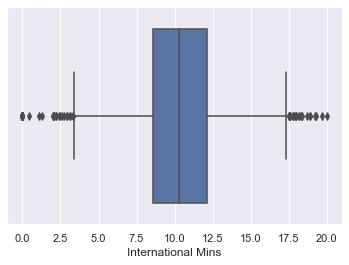

In [706]:
sns.boxplot(x=num['International Mins'])

In [707]:
Q1,Q3 = np.percentile(num['International Mins'],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
int_min = num['International Mins'].mean()
print("Mean Value of International Mins Feature = ",int_min)

Q1 =  8.6
Q2 =  12.1
IQR =  3.5
Lower Bound =  3.3499999999999996
Upper Bound =  17.35
Mean Value of International Mins Feature =  10.279293913796819


In [708]:
num['International Mins'] = np.where(num['International Mins'] < 3.34, 10.27,num['International Mins'])
num['International Mins'] = np.where(num['International Mins'] > 17.35, 10.27,num['International Mins'])

<ipython-input-708-717a50ce6cc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['International Mins'] = np.where(num['International Mins'] < 3.34, 10.27,num['International Mins'])
<ipython-input-708-717a50ce6cc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['International Mins'] = np.where(num['International Mins'] > 17.35, 10.27,num['International Mins'])


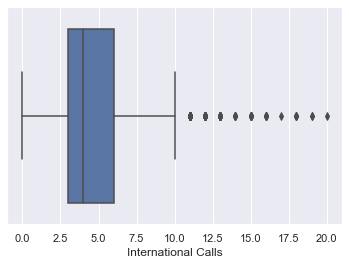

In [709]:
sns.boxplot(x=num['International Calls'])

In [710]:
Q1,Q3 = np.percentile(num['International Calls'],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
int_cal = num['International Calls'].mean()
print("Mean Value of International Calls Feature = ",int_cal)

Q1 =  3.0
Q2 =  6.0
IQR =  3.0
Lower Bound =  -1.5
Upper Bound =  10.5
Mean Value of International Calls Feature =  4.4338314923110245


In [711]:
num['International Calls'] = np.where(num['International Calls'] < -1.5, 4.43,num['International Calls'])
num['International Calls'] = np.where(num['International Calls'] > 10.5, 4.43,num['International Calls'])

<ipython-input-711-bd9fb570819c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['International Calls'] = np.where(num['International Calls'] < -1.5, 4.43,num['International Calls'])
<ipython-input-711-bd9fb570819c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['International Calls'] = np.where(num['International Calls'] > 10.5, 4.43,num['International Calls'])


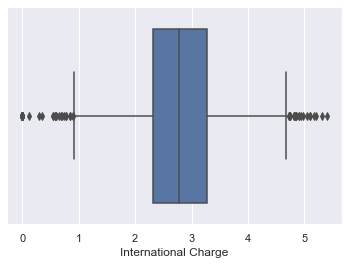

In [712]:
sns.boxplot(x=num['International Charge'])

In [713]:
Q1,Q3 = np.percentile(num['International Charge'],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
int_chr = num['International Charge'].mean()
print("Mean Value of International Charge Feature = ",int_chr)

Q1 =  2.32
Q2 =  3.27
IQR =  0.9500000000000002
Lower Bound =  0.8949999999999996
Upper Bound =  4.695
Mean Value of International Charge Feature =  2.7759259259259106


In [714]:
num['International Charge'] = np.where(num['International Charge'] < 0.89, 2.77,num['International Charge'])
num['International Charge'] = np.where(num['International Charge'] > 4.69, 2.77,num['International Charge'])

<ipython-input-714-533bd3ad8aab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['International Charge'] = np.where(num['International Charge'] < 0.89, 2.77,num['International Charge'])
<ipython-input-714-533bd3ad8aab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['International Charge'] = np.where(num['International Charge'] > 4.69, 2.77,num['International Charge'])


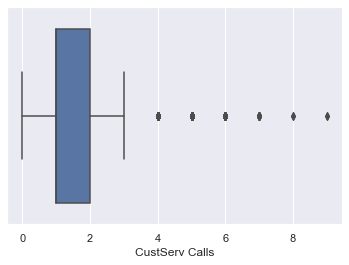

In [715]:
sns.boxplot(x=num['CustServ Calls'])

In [716]:
Q1,Q3 = np.percentile(num['CustServ Calls'],[25,75])
print("Q1 = ",Q1)
print("Q2 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
cus_ser = num['CustServ Calls'].mean()
print("Mean Value of CustServ Calls Feature = ",cus_ser)

Q1 =  1.0
Q2 =  2.0
IQR =  1.0
Lower Bound =  -0.5
Upper Bound =  3.5
Mean Value of CustServ Calls Feature =  1.5670348711284383


In [717]:
num['CustServ Calls'] = np.where(num['CustServ Calls'] < -0.5, 1.56,num['CustServ Calls'])
num['CustServ Calls'] = np.where(num['CustServ Calls'] > 3.5, 1.56,num['CustServ Calls'])

<ipython-input-717-94f64c4a7d56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['CustServ Calls'] = np.where(num['CustServ Calls'] < -0.5, 1.56,num['CustServ Calls'])
<ipython-input-717-94f64c4a7d56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['CustServ Calls'] = np.where(num['CustServ Calls'] > 3.5, 1.56,num['CustServ Calls'])


- Succesfully Removed All The Outliers
- Replaced Ouliers with Mean Value

##### Creating Clean Dataset

In [718]:
cat = pd.DataFrame(cat.iloc[:,2:])
#cat = cat.['International Plan','VMail Plan','Churn']
cat

International Plan  VMail Plan  Churn
0                      0           1      0
1                      0           1      0
2                      0           0      0
3                      1           0      0
4                      1           0      0
...                  ...         ...    ...
4612                   0           1      0
4613                   0           1      0
4614                   0           1      0
4615                   0           1      0
4616                   0           0      0

[4617 rows x 3 columns]

In [719]:
num

Account Length  Area Code  VMail Message  Day Mins  Day Calls  \
0              128.0        415           25.0     265.1      110.0   
1              107.0        415           26.0     161.6      123.0   
2              137.0        415            0.0     243.4      114.0   
3               84.0        408            0.0     299.4       71.0   
4               75.0        415            0.0     166.7      113.0   
...              ...        ...            ...       ...        ...   
4612            57.0        510           25.0     144.0       81.0   
4613           177.0        408           29.0     189.0       91.0   
4614            67.0        408           33.0     127.5      126.0   
4615            98.0        415           23.0     168.9       98.0   
4616           140.0        415            0.0     204.7      100.0   

      Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  \
0          45.07    197.40       99.0       16.78       244.7         91.0   
1          27.47    195.50      103.0       16.62       254.4        103.0   
2          41.38    121.20      110.0       10.30       162.6        104.0   
3          50.90    200.42       88.0       17.03       196.9         89.0   
4          28.34    148.30      122.0       12.61       186.9        121.0   
...          ...       ...        ...         ...         ...          ...   
4612       24.48    187.20      112.0       15.91       158.6        122.0   
4613       32.13    303.10       96.0       25.76       163.6        116.0   
4614       21.68    296.10      129.0       25.17       200.9         91.0   
4615       28.71    226.30      117.0       19.24       165.5         96.0   
4616       34.80    126.80      107.0       10.78       202.8        115.0   

      Night Charge  International Mins  International Calls  \
0            11.01                10.0                  3.0   
1            11.45                13.7                  3.0   
2             7.32                12.2                  5.0   
3             8.86                 6.6                  7.0   
4             8.41                10.1                  3.0   
...            ...                 ...                  ...   
4612          7.14                 8.5                  6.0   
4613          7.36                15.7                  1.0   
4614          9.04                13.0                  3.0   
4615          7.45                14.3                  3.0   
4616          9.13                12.1                  4.0   

      International Charge  CustServ Calls  
0                     2.70             1.0  
1                     3.70             1.0  
2                     3.29             0.0  
3                     1.78             2.0  
4                     2.73             3.0  
...                    ...             ...  
4612                  2.30             3.0  
4613                  4.24             3.0  
4614                  3.51             1.0  
4615                  3.86             0.0  
4616                  3.27             2.0  

[4617 rows x 16 columns]

In [720]:
feat = [num,cat]
Churn = pd.concat(feat,axis=1)
Churn

Account Length  Area Code  VMail Message  Day Mins  Day Calls  \
0              128.0        415           25.0     265.1      110.0   
1              107.0        415           26.0     161.6      123.0   
2              137.0        415            0.0     243.4      114.0   
3               84.0        408            0.0     299.4       71.0   
4               75.0        415            0.0     166.7      113.0   
...              ...        ...            ...       ...        ...   
4612            57.0        510           25.0     144.0       81.0   
4613           177.0        408           29.0     189.0       91.0   
4614            67.0        408           33.0     127.5      126.0   
4615            98.0        415           23.0     168.9       98.0   
4616           140.0        415            0.0     204.7      100.0   

      Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  \
0          45.07    197.40       99.0       16.78       244.7         91.0   
1          27.47    195.50      103.0       16.62       254.4        103.0   
2          41.38    121.20      110.0       10.30       162.6        104.0   
3          50.90    200.42       88.0       17.03       196.9         89.0   
4          28.34    148.30      122.0       12.61       186.9        121.0   
...          ...       ...        ...         ...         ...          ...   
4612       24.48    187.20      112.0       15.91       158.6        122.0   
4613       32.13    303.10       96.0       25.76       163.6        116.0   
4614       21.68    296.10      129.0       25.17       200.9         91.0   
4615       28.71    226.30      117.0       19.24       165.5         96.0   
4616       34.80    126.80      107.0       10.78       202.8        115.0   

      Night Charge  International Mins  International Calls  \
0            11.01                10.0                  3.0   
1            11.45                13.7                  3.0   
2             7.32                12.2                  5.0   
3             8.86                 6.6                  7.0   
4             8.41                10.1                  3.0   
...            ...                 ...                  ...   
4612          7.14                 8.5                  6.0   
4613          7.36                15.7                  1.0   
4614          9.04                13.0                  3.0   
4615          7.45                14.3                  3.0   
4616          9.13                12.1                  4.0   

      International Charge  CustServ Calls  International Plan  VMail Plan  \
0                     2.70             1.0                   0           1   
1                     3.70             1.0                   0           1   
2                     3.29             0.0                   0           0   
3                     1.78             2.0                   1           0   
4                     2.73             3.0                   1           0   
...                    ...             ...                 ...         ...   
4612                  2.30             3.0                   0           1   
4613                  4.24             3.0                   0           1   
4614                  3.51             1.0                   0           1   
4615                  3.86             0.0                   0           1   
4616                  3.27             2.0                   0           0   

      Churn  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
4612      0  
4613      0  
4614      0  
4615      0  
4616      0  

[4617 rows x 19 columns]

### Feature Engg. 

##### Feature Selection : 

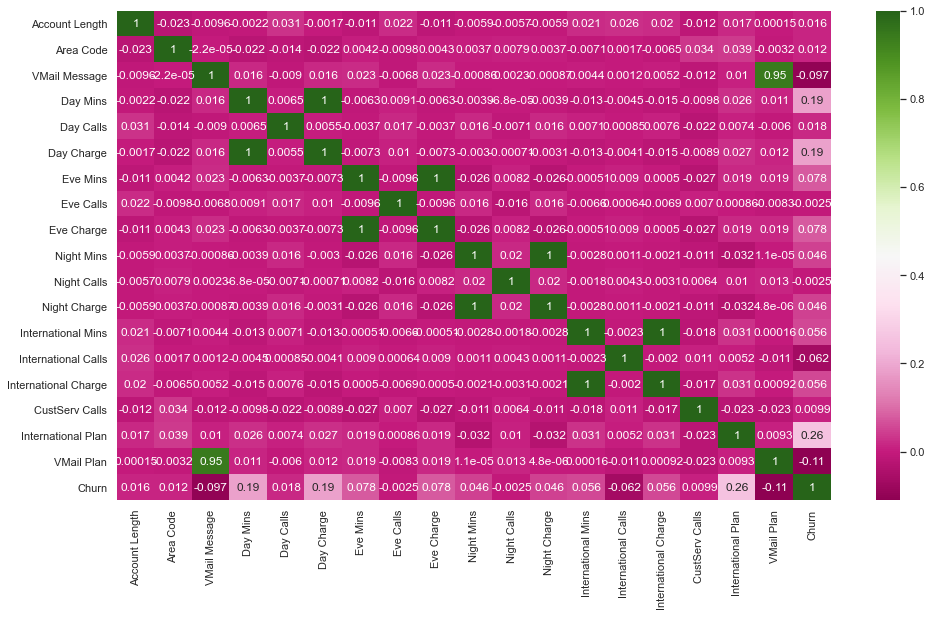

In [721]:
# Check Correlation Matrix using pearson correlation
corr = Churn.corr(method='pearson')
top_corr_features = corr.index
plt.figure(figsize=(16,9))
#plot heat map
g=sns.heatmap(Churn[top_corr_features].corr(),annot=True,cmap="PiYG")

In [722]:
# Feature Importance
X = Churn.iloc[:,:-1]  #independent columns
y = Churn["Churn"]    #target column 

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

[0.03857602 0.02589238 0.01663799 0.11751341 0.04083669 0.12033188
 0.05935217 0.03878732 0.05964855 0.04527111 0.04098304 0.04421547
 0.04836679 0.0593349  0.05172886 0.09762279 0.07556443 0.01933619]


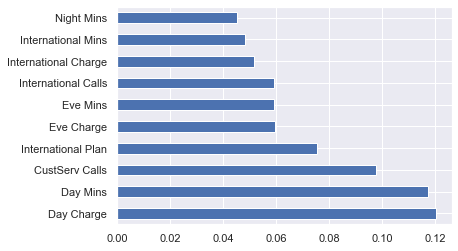

In [723]:
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

- After Visualize Above Plots, These Features Are Highly Correlated With Target Feature 'Churn'

##### Removing Less Correlated Features

In [724]:
Churn.columns

Index(['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'International Mins',
       'International Calls', 'International Charge', 'CustServ Calls',
       'International Plan', 'VMail Plan', 'Churn'],
      dtype='object')

In [725]:
# remove less correlated features
Churn.drop(['Account Length', 'Area Code', 'VMail Message', 'Day Calls',
            'Eve Calls','Night Calls', 'Night Charge', 'VMail Plan'],
          axis=1,inplace = True)
Churn


Day Mins  Day Charge  Eve Mins  Eve Charge  Night Mins  \
0        265.1       45.07    197.40       16.78       244.7   
1        161.6       27.47    195.50       16.62       254.4   
2        243.4       41.38    121.20       10.30       162.6   
3        299.4       50.90    200.42       17.03       196.9   
4        166.7       28.34    148.30       12.61       186.9   
...        ...         ...       ...         ...         ...   
4612     144.0       24.48    187.20       15.91       158.6   
4613     189.0       32.13    303.10       25.76       163.6   
4614     127.5       21.68    296.10       25.17       200.9   
4615     168.9       28.71    226.30       19.24       165.5   
4616     204.7       34.80    126.80       10.78       202.8   

      International Mins  International Calls  International Charge  \
0                   10.0                  3.0                  2.70   
1                   13.7                  3.0                  3.70   
2                   12.2                  5.0                  3.29   
3                    6.6                  7.0                  1.78   
4                   10.1                  3.0                  2.73   
...                  ...                  ...                   ...   
4612                 8.5                  6.0                  2.30   
4613                15.7                  1.0                  4.24   
4614                13.0                  3.0                  3.51   
4615                14.3                  3.0                  3.86   
4616                12.1                  4.0                  3.27   

      CustServ Calls  International Plan  Churn  
0                1.0                   0      0  
1                1.0                   0      0  
2                0.0                   0      0  
3                2.0                   1      0  
4                3.0                   1      0  
...              ...                 ...    ...  
4612             3.0                   0      0  
4613             3.0                   0      0  
4614             1.0                   0      0  
4615             0.0                   0      0  
4616             2.0                   0      0  

[4617 rows x 11 columns]

In [726]:
# Now Columns are
Churn.columns

Index(['Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge', 'Night Mins',
       'International Mins', 'International Calls', 'International Charge',
       'CustServ Calls', 'International Plan', 'Churn'],
      dtype='object')

### Feature Scaling

##### Check Distribution : Normalization

In [727]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Churn)
scaled_features = scaler.transform(Churn)
#Convert to table format - MinMaxScaler
Churn_MinMax = pd.DataFrame(data=scaled_features, 
                            columns=['Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge', 'Night Mins',
                                     'International Mins', 'International Calls', 'International Charge', 
                                     'CustServ Calls', 'International Plan', 'Churn'])
Churn_MinMax

Day Mins  Day Charge  Eve Mins  Eve Charge  Night Mins  \
0     0.789835    0.790702  0.489879    0.489822    0.661982   
1     0.434409    0.436506  0.482886    0.482893    0.697855   
2     0.715316    0.716442  0.209422    0.209181    0.358358   
3     0.907624    0.908030  0.500994    0.500650    0.485207   
4     0.451923    0.454015  0.309165    0.309225    0.448225   
...        ...         ...       ...         ...         ...   
4612  0.373970    0.376333  0.452337    0.452144    0.343565   
4613  0.528503    0.530288  0.878911    0.878735    0.362056   
4614  0.317308    0.319984  0.853147    0.853183    0.500000   
4615  0.459478    0.461461  0.596246    0.596362    0.369083   
4616  0.582418    0.584021  0.230033    0.229970    0.507027   

      International Mins  International Calls  International Charge  \
0               0.474820                  0.3              0.478836   
1               0.741007                  0.3              0.743386   
2               0.633094                  0.5              0.634921   
3               0.230216                  0.7              0.235450   
4               0.482014                  0.3              0.486772   
...                  ...                  ...                   ...   
4612            0.366906                  0.6              0.373016   
4613            0.884892                  0.1              0.886243   
4614            0.690647                  0.3              0.693122   
4615            0.784173                  0.3              0.785714   
4616            0.625899                  0.4              0.629630   

      CustServ Calls  International Plan  Churn  
0           0.333333                 0.0    0.0  
1           0.333333                 0.0    0.0  
2           0.000000                 0.0    0.0  
3           0.666667                 1.0    0.0  
4           1.000000                 1.0    0.0  
...              ...                 ...    ...  
4612        1.000000                 0.0    0.0  
4613        1.000000                 0.0    0.0  
4614        0.333333                 0.0    0.0  
4615        0.000000                 0.0    0.0  
4616        0.666667                 0.0    0.0  

[4617 rows x 11 columns]

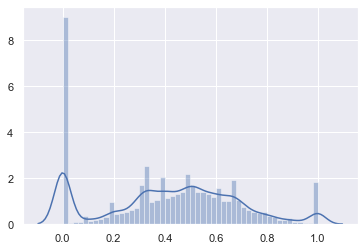

In [728]:
# seaborn plot for dataset
sns.distplot(Churn_MinMax)

In [729]:
#skewness for dataset
skewness = stats.skew(Churn_MinMax)
skewness

array([ 0.01074436,  0.00784595,  0.02656129,  0.02663485,  0.00302885,
       -0.03468026,  0.65227763, -0.0400032 ,  0.2365807 ,  2.73110724,
        2.05029864])

In [730]:
#kurtosis for dataset
kurtosis = stats.kurtosis(Churn_MinMax)
kurtosis

array([-0.23340284, -0.229567  , -0.24162435, -0.24176142, -0.25495328,
       -0.20964742,  0.0879098 , -0.20300976, -0.76183865,  5.45894673,
        2.2037245 ])

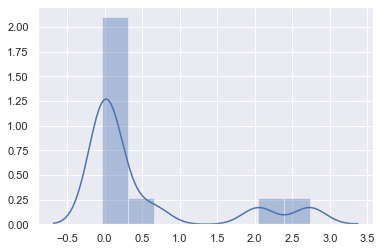

In [731]:
# seaborn plot for skewness for dataset 
sns.distplot(skewness)

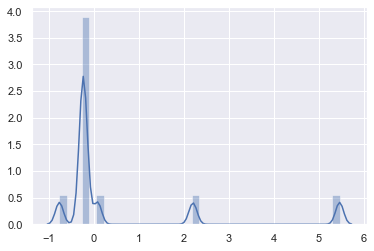

In [732]:
# seaborn plot for kurtosis for dataset 
sns.distplot(kurtosis)

- After Visualize above Plots, The Dataset Isn't Evenly Distributed

##### Formating the Dataset : Standardization 

In [733]:
from sklearn.preprocessing import StandardScaler

In [734]:
sc_X = StandardScaler()
sc_X = sc_X.fit_transform(Churn)
#Convert to table format - StandardScaler 
churn_std = pd.DataFrame(data=sc_X,  
                    columns=['Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge', 'Night Mins',
                             'International Mins', 'International Calls', 'International Charge', 
                             'CustServ Calls', 'International Plan', 'Churn'])
churn_std


Day Mins  Day Charge  Eve Mins  Eve Charge  Night Mins  \
0     1.609682    1.609224 -0.065279   -0.065082    0.905239   
1    -0.359630   -0.359011 -0.104267   -0.103709    1.104535   
2     1.196793    1.196566 -1.628922   -1.629455   -0.781584   
3     2.262315    2.261202 -0.003308   -0.004728   -0.076858   
4    -0.262591   -0.261717 -1.072823   -1.071785   -0.282317   
...        ...         ...       ...         ...         ...   
4612 -0.694508   -0.693387 -0.274585   -0.275114   -0.863768   
4613  0.161715    0.162124  2.103712    2.102829   -0.761038   
4614 -1.008457   -1.006515  1.960070    1.960394    0.005326   
4615 -0.220732   -0.220340  0.527757    0.528800   -0.722001   
4616  0.460441    0.460714 -1.514009   -1.513575    0.044364   

      International Mins  International Calls  International Charge  \
0              -0.126874            -0.601529             -0.126186   
1               1.325742            -0.601529              1.325673   
2               0.736844             0.370388              0.730411   
3              -1.461711             1.342306             -1.461897   
4              -0.087614            -0.601529             -0.082630   
...                  ...                  ...                   ...   
4612           -0.715773             0.856347             -0.706930   
4613            2.110941            -1.573446              2.109677   
4614            1.050923            -0.601529              1.049820   
4615            1.561302            -0.601529              1.557970   
4616            0.697584            -0.115570              0.701373   

      CustServ Calls  International Plan     Churn  
0          -0.350535           -0.327000 -0.406958  
1          -0.350535           -0.327000 -0.406958  
2          -1.416631           -0.327000 -0.406958  
3           0.715561            3.058107 -0.406958  
4           1.781657            3.058107 -0.406958  
...              ...                 ...       ...  
4612        1.781657           -0.327000 -0.406958  
4613        1.781657           -0.327000 -0.406958  
4614       -0.350535           -0.327000 -0.406958  
4615       -1.416631           -0.327000 -0.406958  
4616        0.715561           -0.327000 -0.406958  

[4617 rows x 11 columns]

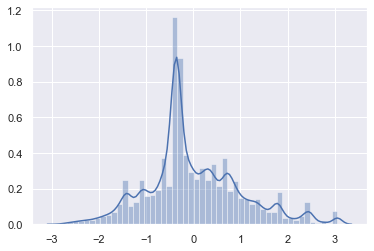

In [735]:
# seaborn plot for dataset
sns.distplot(churn_std)

In [736]:
#skewness for dataset
skewness = stats.skew(churn_std)
skewness

array([ 0.01074436,  0.00784595,  0.02656129,  0.02663485,  0.00302885,
       -0.03468026,  0.65227763, -0.0400032 ,  0.2365807 ,  2.73110724,
        2.05029864])

In [737]:
#kurtosis for dataset
kurtosis = stats.kurtosis(churn_std)
kurtosis

array([-0.23340284, -0.229567  , -0.24162435, -0.24176142, -0.25495328,
       -0.20964742,  0.0879098 , -0.20300976, -0.76183865,  5.45894673,
        2.2037245 ])

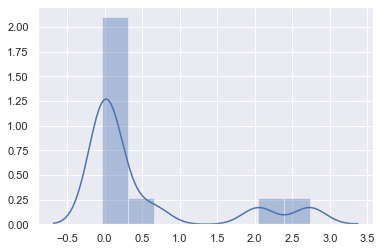

In [738]:
# seaborn plot for skewness for dataset 
sns.distplot(skewness)

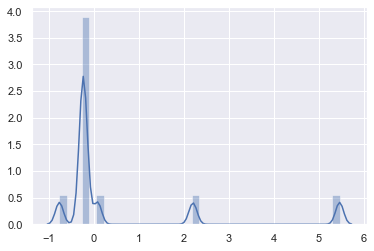

In [739]:
# seaborn plot for kurtosis for dataset 
sns.distplot(kurtosis)

- Dataset is Scaled and Evenly Distributed.

### Model Selection and Building

##### Defining X and y

In [740]:
X = churn_std.iloc[:,:-1]
y = Churn.Churn

In [741]:
X

Day Mins  Day Charge  Eve Mins  Eve Charge  Night Mins  \
0     1.609682    1.609224 -0.065279   -0.065082    0.905239   
1    -0.359630   -0.359011 -0.104267   -0.103709    1.104535   
2     1.196793    1.196566 -1.628922   -1.629455   -0.781584   
3     2.262315    2.261202 -0.003308   -0.004728   -0.076858   
4    -0.262591   -0.261717 -1.072823   -1.071785   -0.282317   
...        ...         ...       ...         ...         ...   
4612 -0.694508   -0.693387 -0.274585   -0.275114   -0.863768   
4613  0.161715    0.162124  2.103712    2.102829   -0.761038   
4614 -1.008457   -1.006515  1.960070    1.960394    0.005326   
4615 -0.220732   -0.220340  0.527757    0.528800   -0.722001   
4616  0.460441    0.460714 -1.514009   -1.513575    0.044364   

      International Mins  International Calls  International Charge  \
0              -0.126874            -0.601529             -0.126186   
1               1.325742            -0.601529              1.325673   
2               0.736844             0.370388              0.730411   
3              -1.461711             1.342306             -1.461897   
4              -0.087614            -0.601529             -0.082630   
...                  ...                  ...                   ...   
4612           -0.715773             0.856347             -0.706930   
4613            2.110941            -1.573446              2.109677   
4614            1.050923            -0.601529              1.049820   
4615            1.561302            -0.601529              1.557970   
4616            0.697584            -0.115570              0.701373   

      CustServ Calls  International Plan  
0          -0.350535           -0.327000  
1          -0.350535           -0.327000  
2          -1.416631           -0.327000  
3           0.715561            3.058107  
4           1.781657            3.058107  
...              ...                 ...  
4612        1.781657           -0.327000  
4613        1.781657           -0.327000  
4614       -0.350535           -0.327000  
4615       -1.416631           -0.327000  
4616        0.715561           -0.327000  

[4617 rows x 10 columns]

In [742]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4612    0
4613    0
4614    0
4615    0
4616    0
Name: Churn, Length: 4617, dtype: int32

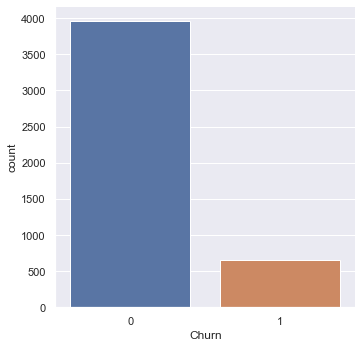

In [743]:
sns.catplot('Churn', data = Churn, kind = 'count')

##### Handle Imbalance Data

In [744]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 3961, 1: 656})


In [745]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_sample(X,y)

In [746]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 3961, 1: 3961})


- Now, Dataset is Balanced.

##### Splitting the Data

In [747]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,test_size=0.3)

In [748]:
# shape of train test data
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (5545, 10)
X_test shape (2377, 10)
y_train shape (5545,)
y_test shape (2377,)


### Creating and Training the Model

##### Hyperparameter Tuning Using GridSerchCV

In [749]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [803]:
model=RandomForestClassifier()
parameters={'max_depth': [30,40,50],
           'n_estimators':[500,1000],
           'random_state':[1,2]}
grid = GridSearchCV(model,parameters,cv=2,verbose=True)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  2.1min finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30, 40, 50], 'n_estimators': [500, 1000],
                         'random_state': [1, 2]},
             verbose=True)

In [804]:
grid.best_score_

0.9327315059824977

In [805]:
grid.best_params_

{'max_depth': 30, 'n_estimators': 500, 'random_state': 1}

In [806]:
grid.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=500, random_state=1)

- This is Best Parameter For Random Forest Classifier For Model Fitting

## Fitting the Model


In [807]:
model = RandomForestClassifier(max_depth=30, n_estimators=500, random_state=1)

In [808]:
model.fit(X_train,y_train)
model.score(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9432057214976861

### Model Evaluation :•For Classification Problem 

##### 1. Accuracy Score

In [809]:
# acuracy score
accuracy_score(y_test,y_predict)

0.9432057214976861

##### 2. Confusion Matrix

In [810]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 1198, 1: 1179})


col_0     0     1
Churn            
0      1146    52
1        83  1096

In [811]:
confusion_matrix(y_test,y_predict)

array([[1146,   52],
       [  83, 1096]], dtype=int64)

##### 3. Error Rate

In [812]:
# errrors
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict)))

0.05679427850231384
0.23831550201846677


##### 4. Precision Score

In [813]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Precision 
print('Precision: %.3f' % precision_score(y_test,y_predict))

Precision: 0.955


##### 5. Recall Score

In [814]:
# Recall 
print('Recall: %.3f' % recall_score(y_test,y_predict))

Recall: 0.930


##### 6. F1 Score

In [815]:
# F1_score 
print('F1_score: %.3f' % f1_score(y_test,y_predict))

F1_score: 0.942


##### 7. Evaluating Precision, recall,F1 score matrix

In [816]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1198
           1       0.95      0.93      0.94      1179

    accuracy                           0.94      2377
   macro avg       0.94      0.94      0.94      2377
weighted avg       0.94      0.94      0.94      2377



##### 9. ROC AUC Score & Curve

In [817]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 1, 1])

In [818]:
model.predict_proba(X_test)

array([[0.986, 0.014],
       [0.824, 0.176],
       [0.972, 0.028],
       ...,
       [0.064, 0.936],
       [0.362, 0.638],
       [0.258, 0.742]])

In [819]:
y_predict_th2 = np.where(model.predict_proba(X_test)[:,1]>0.2,1,0) # Threshold is 0.2
y_predict_th3 = np.where(model.predict_proba(X_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(model.predict_proba(X_test)[:,1]>0.4,1,0) # Threshold is 0.4

In [820]:
pd.crosstab(y_test,y_predict_th4)

col_0     0     1
Churn            
0      1121    77
1        55  1124

In [821]:
def predict_threshold (model,X_test,thresholds):
    import numpy as np
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) # Threshold is 0.3

In [822]:
# thresholds
for thr in np.arange(0,1.1,0.1):
    y_predict = predict_threshold(model,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[   0 1198]
 [   0 1179]]
Threshold : 0.1
[[ 735  463]
 [   9 1170]]
Threshold : 0.2
[[ 983  215]
 [  18 1161]]
Threshold : 0.30000000000000004
[[1074  124]
 [  31 1148]]
Threshold : 0.4
[[1121   77]
 [  55 1124]]
Threshold : 0.5
[[1146   52]
 [  83 1096]]
Threshold : 0.6000000000000001
[[1162   36]
 [ 125 1054]]
Threshold : 0.7000000000000001
[[1172   26]
 [ 159 1020]]
Threshold : 0.8
[[1181   17]
 [ 217  962]]
Threshold : 0.9
[[1191    7]
 [ 375  804]]
Threshold : 1.0
[[1198    0]
 [1179    0]]


In [823]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.preprocessing import label_binarize
probs = model.predict_proba(X_test)
y_score = probs

In [824]:
y=label_binarize(y, classes=[0,1])
print(y)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [825]:

fpr = {}
tpr = {}
threshold = {}
roc_auc_score = {}

In [826]:
for i in range(0,2):
    fpr[i], tpr[i],threshold[i] = roc_curve(y_test,y_score[:,i], pos_label=i)
    roc_auc_score = auc(fpr[i],tpr[i])

In [827]:
print(roc_auc_score)

0.983427638090626


In [828]:
fpr

{0: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 8.48176421e-04, 8.48176421e-04,
        8.48176421e-04, 8.48176421e-04, 8.48176421e-04, 8.48176421e-04,
        8.48176421e-04, 1.69635284e-03, 1.69635284e-03, 1.69635284e-03,
        1.69635284e-03, 2.54452926e-03, 2.54452926e-03, 3.39270568e-03,
        4.24088210e-03, 4.24088210e-03, 4.24088210e-03, 5.08905852e-03,
        5.08905852e-03, 5.08905852e-03, 5.93723494e-03, 5.93723494e-03,
        5.93723494e-03, 5.93723494e-03, 5.93723494e-03, 5.93723494e-03,
        5.93723494e-03, 5.93723494e-03, 5.93723494e-03, 5.93723494e-03,
        5.93723494e-03, 5.93723494e-03, 6.78541137e-03, 7.63358779e-03,
        7.63358779e-03, 8.48176421e-03, 8.48176421e-03, 8.48176421e-03,
        9.32994063e-03, 9.32994063e-03, 9.32994063e-03, 9.329

In [829]:
tpr

{0: array([0.00000000e+00, 8.34724541e-04, 3.33889816e-03, 1.00166945e-02,
        2.00333890e-02, 2.42070117e-02, 3.33889816e-02, 3.92320534e-02,
        5.25876461e-02, 6.84474124e-02, 8.59766277e-02, 1.14357262e-01,
        1.26878130e-01, 1.36894825e-01, 1.56928214e-01, 1.72787980e-01,
        1.89482471e-01, 2.04507513e-01, 2.27879800e-01, 2.49582638e-01,
        2.63772955e-01, 2.77128548e-01, 2.91318865e-01, 3.23038397e-01,
        3.39732888e-01, 3.53923205e-01, 3.69782972e-01, 3.81469115e-01,
        3.94824708e-01, 4.11519199e-01, 4.27378965e-01, 4.34056761e-01,
        4.44073456e-01, 4.60767947e-01, 4.73288815e-01, 4.85809683e-01,
        5.02504174e-01, 5.14190317e-01, 5.20868114e-01, 5.30050083e-01,
        5.45075125e-01, 5.55091820e-01, 5.62604341e-01, 5.69282137e-01,
        5.76794658e-01, 5.83472454e-01, 5.95158598e-01, 6.03505843e-01,
        6.13522538e-01, 6.19365609e-01, 6.26043406e-01, 6.31051753e-01,
        6.37729549e-01, 6.43572621e-01, 6.46911519e-01, 6.519

In [830]:
threshold

{0: array([1.996, 0.996, 0.994, 0.992, 0.99 , 0.988, 0.986, 0.984, 0.982,
        0.98 , 0.978, 0.976, 0.974, 0.972, 0.97 , 0.968, 0.966, 0.964,
        0.962, 0.96 , 0.958, 0.956, 0.954, 0.95 , 0.948, 0.946, 0.944,
        0.942, 0.94 , 0.938, 0.936, 0.934, 0.932, 0.93 , 0.928, 0.926,
        0.924, 0.922, 0.92 , 0.918, 0.916, 0.914, 0.912, 0.91 , 0.908,
        0.906, 0.904, 0.902, 0.9  , 0.898, 0.896, 0.894, 0.892, 0.89 ,
        0.888, 0.886, 0.884, 0.882, 0.88 , 0.878, 0.874, 0.87 , 0.866,
        0.864, 0.862, 0.86 , 0.858, 0.856, 0.854, 0.85 , 0.848, 0.846,
        0.844, 0.838, 0.834, 0.832, 0.83 , 0.828, 0.826, 0.824, 0.822,
        0.82 , 0.818, 0.816, 0.814, 0.812, 0.81 , 0.808, 0.806, 0.802,
        0.8  , 0.798, 0.796, 0.794, 0.788, 0.774, 0.772, 0.77 , 0.766,
        0.764, 0.762, 0.76 , 0.758, 0.756, 0.754, 0.752, 0.748, 0.746,
        0.744, 0.742, 0.738, 0.734, 0.732, 0.73 , 0.728, 0.726, 0.724,
        0.722, 0.72 , 0.718, 0.71 , 0.708, 0.706, 0.704, 0.702, 0.7  ,
   

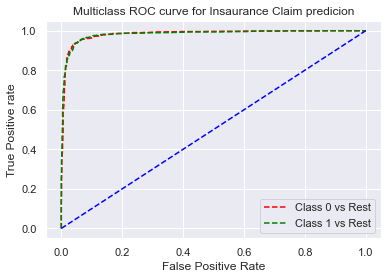

In [831]:
# plot of ROC curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest') 
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('Multiclass ROC curve for Insaurance Claim predicion') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 
plt.legend(loc='best') 
plt.savefig('Multiclass ROC',dpi=500);